In [1]:
# Let's import some useful libraries 
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import statistics as stat
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [2]:
# import-read the file 'fifa21_male2' into a pandas DataFrame and see the its shape, it has 17125 rows and 107 columns
fifa = pd.read_csv('fifa21_male2.csv')
pd.set_option('display.max_columns',None)
fifa.shape

(17125, 107)

In [3]:
# some general info about the dataframe
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [4]:
# let's see the columns in a list to understand the features
# fifa.columns or better
list(fifa.columns)

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [5]:
# Checking out the data types in a list
#fifa.dtypes
list(zip(fifa.columns,fifa.dtypes))

[('ID', dtype('int64')),
 ('Name', dtype('O')),
 ('Age', dtype('int64')),
 ('OVA', dtype('int64')),
 ('Nationality', dtype('O')),
 ('Club', dtype('O')),
 ('BOV', dtype('int64')),
 ('BP', dtype('O')),
 ('Position', dtype('O')),
 ('Player Photo', dtype('O')),
 ('Club Logo', dtype('O')),
 ('Flag Photo', dtype('O')),
 ('POT', dtype('int64')),
 ('Team & Contract', dtype('O')),
 ('Height', dtype('O')),
 ('Weight', dtype('O')),
 ('foot', dtype('O')),
 ('Growth', dtype('int64')),
 ('Joined', dtype('O')),
 ('Loan Date End', dtype('O')),
 ('Value', dtype('O')),
 ('Wage', dtype('O')),
 ('Release Clause', dtype('O')),
 ('Contract', dtype('O')),
 ('Attacking', dtype('int64')),
 ('Crossing', dtype('int64')),
 ('Finishing', dtype('int64')),
 ('Heading Accuracy', dtype('int64')),
 ('Short Passing', dtype('int64')),
 ('Volleys', dtype('float64')),
 ('Skill', dtype('int64')),
 ('Dribbling', dtype('int64')),
 ('Curve', dtype('float64')),
 ('FK Accuracy', dtype('int64')),
 ('Long Passing', dtype('int64'))

In [6]:
# We are gonna display the head of the dataframe
display(fifa.head())

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

## We will standardize the columns and we will make some data cleaning and then EDA

In [7]:
#Standardize header-column names in the dataframe by using only lowercase letters and by replacing the spaces with underscores
fifa.columns = [fifa.columns[i].lower().replace(' ', '_') for i in range(len(fifa.columns))]
list(fifa.columns)

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player_photo',
 'club_logo',
 'flag_photo',
 'pot',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

In [8]:
# more standardization of the columns, replacing '/' with '_' and '&' with'and'
fifa.columns = fifa.columns.str.replace('/','_')
fifa.columns = fifa.columns.str.replace('&','and')

In [9]:
# Let's check the dataframe by displaying its tail
display(fifa.tail())

id             name  age  ova         nationality           club  \
17120  259088       A. Medioub   22   64              France     CD Tondela   
17121  259090       W. Rickard   18   56               Wales        Burnley   
17122  259091       C. Barrett   18   56             England        Burnley   
17123  259101   J. Gazibegović   20   62  Bosnia Herzegovina  SK Sturm Graz   
17124  259105  Pablo Rodríguez   18   59               Spain          Lecce   

       bov   bp position                                       player_photo  \
17120   66   CB       CB  https://cdn.sofifa.com/players/259/088/20_120.png   
17121   58  CAM   CAM CM  https://cdn.sofifa.com/players/259/090/20_120.png   
17122   56   RB       RB  https://cdn.sofifa.com/players/259/091/20_120.png   
17123   62   RB    RB LB  https://cdn.sofifa.com/players/259/101/20_120.png   
17124   61   ST       ST  https://cdn.sofifa.com/players/259/105/20_120.png   

                                              club_logo  \
17120  https://cdn.sofifa.com/teams/112516/light_60.png   
17121    https://cdn.sofifa.com/teams/1796/light_60.png   
17122    https://cdn.sofifa.com/teams/1796/light_60.png   
17123     https://cdn.sofifa.com/teams/209/light_60.png   
17124     https://cdn.sofifa.com/teams/347/light_60.png   

                                    flag_photo  pot  \
17120      https://cdn.sofifa.com/flags/fr.png   69   
17121  https://cdn.sofifa.com/flags/gb-wls.png   66   
17122  https://cdn.sofifa.com/flags/gb-eng.png   67   
17123      https://cdn.sofifa.com/flags/ba.png   73   
17124      https://cdn.sofifa.com/flags/es.png   74   

                     team_and_contract height  weight   foot  growth  \
17120  CD Tondela Jun 30, 2021 On Loan   6'6"  165lbs  Right       5   
17121              Burnley 2020 ~ 2021  5'10"  170lbs  Right      10   
17122              Burnley 2020 ~ 2022   5'9"  154lbs  Right      11   
17123        SK Sturm Graz 2020 ~ 2023   5'9"  148lbs  Right      11   
17124                Lecce 2020 ~ 2024  5'10"  154lbs  Right      15   

             joined loan_date_end  value wage release_clause  \
17120  Sep 29, 2020  Jun 30, 2021  €550K  €2K             €0   
17121  Aug 20, 2020           NaN  €130K  €3K          €273K   
17122  Aug 20, 2020           NaN  €130K  €2K          €273K   
17123  Sep 30, 2020           NaN  €475K  €3K          €784K   
17124  Sep 30, 2020           NaN  €325K  €2K          €788K   

                   contract  attacking  crossing  finishing  heading_accuracy  \
17120  Jun 30, 2021 On Loan        197        35         23                66   
17121           2020 ~ 2021        248        50         43                50   
17122           2020 ~ 2022        218        55         34                53   
17123           2020 ~ 2023        223        62         26                52   
17124           2020 ~ 2024        254        32         64                59   

       short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
17120             47     26.0    193         44   26.0           33   
17121             64     41.0    264         57   42.0           50   
17122             42     34.0    212         52   43.0           34   
17123             60     23.0    258         55   43.0           46   
17124             45     54.0    235         57   45.0           48   

       long_passing  ball_control  movement  acceleration  sprint_speed  \
17120            34            56       243            52            55   
17121            61            54       298            61            63   
17122            36            47       308            66            61   
17123            57            57       349            72            70   
17124            30            55       317            68            72   

       agility  reactions  balance  power  shot_power  jumping  stamina  \
17120     46.0         48     42.0    279          48     70.0       59   
17121     52.0         54     68.0    271 

In [10]:
# Checking for the number unique features in each column
fifa.nunique()

id             17125
name           16176
age               30
ova               50
nationality      167
               ...  
cb               328
rcb              328
rb               275
gk               169
gender             1
Length: 107, dtype: int64

In [11]:
# we can notice that some columns are the same but let's check it

In [12]:
# checking columns lf and rf and counting how many values are the same in the two columns
similarity1 = fifa['lf'] == fifa['rf']
similarity1.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [13]:
# checking columns lf and cf and counting how many values are the same in the two columns
similarity2 = fifa['lf'] == fifa['cf']
similarity2.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [14]:
# checking columns ldm and rdm and counting how many values are the same in the two columns
similarity3 = fifa['ldm'] == fifa['rdm']
similarity3.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [15]:
# checking columns ldm and cdm and counting how many values are the same in the two columns
similarity4 = fifa['ldm'] == fifa['cdm']
similarity4.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [16]:
# checking columns lcb and cb and counting how many values are the same in the two columns
similarity5 = fifa['lcb'] == fifa['cb']
similarity5.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [17]:
# checking columns lcb and rcb and counting how many values are the same in the two columns
similarity6 = fifa['lcb'] == fifa['rcb']
similarity6.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [18]:
# checking columns rwb and lwb and counting how many values are the same in the two columns
similarity7 = fifa['rwb'] == fifa['lwb']
similarity7.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [19]:
# checking columns rm and lm and counting how many values are the same in the two columns
similarity8 = fifa['rm'] == fifa['lm']
similarity8.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [20]:
# checking columns lcm and rcm and counting how many values are the same in the two columns
similarity9 = fifa['lcm'] == fifa['rcm']
similarity9.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [21]:
# checking columns lam and ram and counting how many values are the same in the two columns
similarity10 = fifa['lam'] == fifa['ram']
similarity10.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [22]:
# checking columns rw and lw and counting how many values are the same in the two columns
similarity11 = fifa['rw'] == fifa['lw']
similarity11.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [23]:
# checking columns ls and rs and counting how many values are the same in the two columns
similarity12 = fifa['ls'] == fifa['rs']
similarity12.value_counts()
#  we have 100% similarity and every row has the same value in the corresponding value from the other column

True    17125
dtype: int64

In [24]:
# we can also notice that every value in the column gender is male
# also from fifa.nunique()
fifa['gender'].value_counts()

Male    17125
Name: gender, dtype: int64

In [25]:
# we will drop some columns so we will not have duplicate info in many columns but only in one
fifa_drop1 = fifa.drop(['id', 'lf', 'rf', 'ldm', 'rdm', 'lcb', 'rcb', 'rwb', 'rm', 'lcm', 'rcm', 'lam', 'ram', 'rw', 'ls', 'rs', 'rb', 'gender' ], axis=1)
fifa_drop1.head()

name  age  ova            nationality           club  bov   bp  \
0  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2      J. Cole   33   71                England  Coventry City   71  CAM   
3     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position                                       player_photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          club_logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                flag_photo  pot          team_and_contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  height  weight   foot  growth        joined loan_date_end  value  wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  release_clause     contract  attacking  crossing  finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   fk_accuracy  long_passing  ball_control  movement  acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   stamina  strength  long_shots  mentality  aggression  interceptions  \
0       69        68          68        320          72           69.0   
1       64        60     

In [26]:
# Let's also drop some columns we don't need as they are not numerical or categorical data and we don't have clear info in this dataframe
fifa_drop2 = fifa_drop1.drop(['player_photo', 'club_logo', 'flag_photo'], axis=1)
fifa_drop2.head()

name  age  ova            nationality           club  bov   bp  \
0  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2      J. Cole   33   71                England  Coventry City   71  CAM   
3     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position  pot          team_and_contract height  weight   foot  growth  \
0            LM   69        Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   
1    CM CAM CDM   71      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0   
2  CAM RM RW LM   71  Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   
3           NaN   82            Sunderland 2009  5'11"  165lbs  Right      14   
4        CM CAM   81    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0   

         joined loan_date_end  value  wage release_clause     contract  \
0   Jul 1, 2008           NaN  €625K   €7K             €0  2008 ~ 2016   
1  Jul 19, 2014           NaN  €600K   €7K          €1.1M  2014 ~ 2019   
2   Jan 7, 2016           NaN  €1.1M  €15K             €0  2016 ~ 2020   
3           NaN           NaN     €0    €0             €0         2009   
4  Jul 16, 2018           NaN  €5.5M  €12K          €7.2M  2018 ~ 2021   

   attacking  crossing  finishing  heading_accuracy  short_passing  volleys  \
0        313        75         50                59             71     58.0   
1        337        68         64                61             76     68.0   
2        337        80         64                41             77     75.0   
3        264        54         70                60             80      NaN   
4        367        75         69                54             90     79.0   

   skill  dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
0    338         73   65.0           60            69            71       347   
1    369         69   79.0           79            71            71       305   
2    387         79   84.0           77            69            78       295   
3    255         68    NaN           46            64            77       176   
4    408         85   80.0           70            83            90       346   

   acceleration  sprint_speed  agility  reactions  balance  power  shot_power  \
0            68            74     68.0         69     68.0    347          74   
1            56            50     62.0         65     72.0    324          75   
2            48            42     71.0         59     75.0    284          72   
3            59            62      NaN         55      NaN    239          63   
4            61            56     79.0         75     75.0    297          67   

   jumping  stamina  strength  long_shots  mentality  aggression  \
0     68.0       69        68          68        320          72   
1     54.0       64        60          71        362          71   
2     58.0       29        56          69        317          69   
3      NaN       51        66          59        271          59   
4     40.0       58        62          70        370          58   

   interceptions  positioning  vision  penalties  composure  defending  \
0           69.0         63.0    66.0         50        NaN        208   
1           71.0         72.0    73.0         75       79.0        153   
2           39.0         69.0    74.0         66        NaN         99   
3           70.0         72.0     NaN         70        NaN         75   
4           70.0         78.0    93.0         71       89.0        181   

   marking  standing_tackle  sliding_tackle  goalkeeping  gk_diving  \
0       70               69            69.0           56         14   
1       70               43            40.0           56          9   
2       35               34            30.0           51          9   
3       34               41       

In [27]:
fifa_drop2.shape

(17125, 86)

In [28]:
# creating a new column called club_and_contract from values of the columns 'club' and 'contract'
fifa_drop2["club_and_contract"] = fifa_drop2["club"] + ' ' + fifa_drop2["contract"]
fifa_drop2.head()

name  age  ova            nationality           club  bov   bp  \
0  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2      J. Cole   33   71                England  Coventry City   71  CAM   
3     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position  pot          team_and_contract height  weight   foot  growth  \
0            LM   69        Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   
1    CM CAM CDM   71      KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0   
2  CAM RM RW LM   71  Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   
3           NaN   82            Sunderland 2009  5'11"  165lbs  Right      14   
4        CM CAM   81    Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0   

         joined loan_date_end  value  wage release_clause     contract  \
0   Jul 1, 2008           NaN  €625K   €7K             €0  2008 ~ 2016   
1  Jul 19, 2014           NaN  €600K   €7K          €1.1M  2014 ~ 2019   
2   Jan 7, 2016           NaN  €1.1M  €15K             €0  2016 ~ 2020   
3           NaN           NaN     €0    €0             €0         2009   
4  Jul 16, 2018           NaN  €5.5M  €12K          €7.2M  2018 ~ 2021   

   attacking  crossing  finishing  heading_accuracy  short_passing  volleys  \
0        313        75         50                59             71     58.0   
1        337        68         64                61             76     68.0   
2        337        80         64                41             77     75.0   
3        264        54         70                60             80      NaN   
4        367        75         69                54             90     79.0   

   skill  dribbling  curve  fk_accuracy  long_passing  ball_control  movement  \
0    338         73   65.0           60            69            71       347   
1    369         69   79.0           79            71            71       305   
2    387         79   84.0           77            69            78       295   
3    255         68    NaN           46            64            77       176   
4    408         85   80.0           70            83            90       346   

   acceleration  sprint_speed  agility  reactions  balance  power  shot_power  \
0            68            74     68.0         69     68.0    347          74   
1            56            50     62.0         65     72.0    324          75   
2            48            42     71.0         59     75.0    284          72   
3            59            62      NaN         55      NaN    239          63   
4            61            56     79.0         75     75.0    297          67   

   jumping  stamina  strength  long_shots  mentality  aggression  \
0     68.0       69        68          68        320          72   
1     54.0       64        60          71        362          71   
2     58.0       29        56          69        317          69   
3      NaN       51        66          59        271          59   
4     40.0       58        62          70        370          58   

   interceptions  positioning  vision  penalties  composure  defending  \
0           69.0         63.0    66.0         50        NaN        208   
1           71.0         72.0    73.0         75       79.0        153   
2           39.0         69.0    74.0         66        NaN         99   
3           70.0         72.0     NaN         70        NaN         75   
4           70.0         78.0    93.0         71       89.0        181   

   marking  standing_tackle  sliding_tackle  goalkeeping  gk_diving  \
0       70               69            69.0           56         14   
1       70               43            40.0           56          9   
2       35               34            30.0           51          9   
3       34               41       

In [29]:
# checking columns 'team_and_contract' and 'club_and_contract' and counting how many values are the same in the two columns
similarity13 = fifa_drop2['team_and_contract'] == fifa_drop2['club_and_contract']
similarity13.value_counts()

True     16912
False      213
dtype: int64

In [30]:
# most of the values are the same so we will drop the column 'club_and_contract', 'club' and 'contract'  
# as they have similar info, we will keep the column 'team_and_contract'
fifa_drop3 = fifa_drop2.drop(['club_and_contract','team_and_contract'], axis=1)
# fifa_drop3.head()
fifa_drop3.shape

(17125, 85)

In [31]:
# Let's rename some columns
fifa_renamed = fifa_drop3.rename(columns={'ova':'overall_rating', 
                                          'bov':'best_overall',
                                          'bp':'best_position',
                                          'pot':'potential',
                                          'w_f':'weak_foot', 
                                          'sm':'skill_moves',
                                          'a_w':'attacking_work_rate',
                                          'd_w':'defensive_work_rate',
                                          'ir':'international_reputation',
                                          'pac':'pace_diving',
                                          'sho':'shooting_handling',
                                          'pas':'passing_kicking',
                                          'dri':'dribbling_reflexes',
                                          'def':'defending_pace',
                                          'phy':'physical_positioning'
                                           })
fifa_renamed.head()
# st, lw, cf, cam, lm, cm, lwb, cdm, lb, cb, gk are football player positions 

name  age  overall_rating            nationality           club  \
0  G. Pasquale   33              69                  Italy        Udinese   
1  Luis García   37              71                  Spain      KAS Eupen   
2      J. Cole   33              71                England  Coventry City   
3     D. Yorke   36              68  Trinidad &amp; Tobago     Sunderland   
4      Iniesta   36              81                  Spain    Vissel Kobe   

   best_overall best_position      position  potential height  weight   foot  \
0            71           LWB            LM         69   6'0"  181lbs   Left   
1            70            CM    CM CAM CDM         71  5'10"  143lbs  Right   
2            71           CAM  CAM RM RW LM         71   5'9"  161lbs  Right   
3            70            ST           NaN         82  5'11"  165lbs  Right   
4            82           CAM        CM CAM         81   5'7"  150lbs  Right   

   growth        joined loan_date_end  value  wage release_clause  \
0       0   Jul 1, 2008           NaN  €625K   €7K             €0   
1       0  Jul 19, 2014           NaN  €600K   €7K          €1.1M   
2       0   Jan 7, 2016           NaN  €1.1M  €15K             €0   
3      14           NaN           NaN     €0    €0             €0   
4       0  Jul 16, 2018           NaN  €5.5M  €12K          €7.2M   

      contract  attacking  crossing  finishing  heading_accuracy  \
0  2008 ~ 2016        313        75         50                59   
1  2014 ~ 2019        337        68         64                61   
2  2016 ~ 2020        337        80         64                41   
3         2009        264        54         70                60   
4  2018 ~ 2021        367        75         69                54   

   short_passing  volleys  skill  dribbling  curve  fk_accuracy  long_passing  \
0             71     58.0    338         73   65.0           60            69   
1             76     68.0    369         69   79.0           79            71   
2             77     75.0    387         79   84.0           77            69   
3             80      NaN    255         68    NaN           46            64   
4             90     79.0    408         85   80.0           70            83   

   ball_control  movement  acceleration  sprint_speed  agility  reactions  \
0            71       347            68            74     68.0         69   
1            71       305            56            50     62.0         65   
2            78       295            48            42     71.0         59   
3            77       176            59            62      NaN         55   
4            90       346            61            56     79.0         75   

   balance  power  shot_power  jumping  stamina  strength  long_shots  \
0     68.0    347          74     68.0       69        68          68   
1     72.0    324          75     54.0       64        60          71   
2     75.0    284          72     58.0       29        56          69   
3      NaN    239          63      NaN       51        66          59   
4     75.0    297          67     40.0       58        62          70   

   mentality  aggression  interceptions  positioning  vision  penalties  \
0        320          72           69.0         63.0    66.0         50   
1        362          71           71.0         72.0    73.0         75   
2        317          69           39.0         69.0    74.0         66   
3        271          59           70.0         72.0     NaN         70   
4        370          58           70.0         78.0    93.0         71   

   composure  defending  marking  standing_tackle  sliding_tackle  \
0        NaN        208       70               69            69.0   
1       79.0        153       70               43            40.0   
2        NaN         99       35               34            30.0   
3        NaN         75       34               41             NaN   
4       89.0        181       68               57        

In [32]:
# Here are the explanations of the columns
# age : age of footballer
# overall_rating : or ranking means a rating or ranking that is computed from performance 
# data for a mutual fund over one or more periods of standard performance data, which at a minimum include the longest period.
# nationality : the nationality of the player
# club : the team of the player
# best_overall :  in-game power
# best_position : the best football position, where the football player performs the best
# position : different positions that the footballers could play
# potential :  the potential of the footballer, the ability of the footballer to become better
# height : footballer's height
# weight : footballer's weight
# foot : the strongest foot of the footballer
# growth : footballer's growth
# joined : the  date that the player joined to the club
# loan_date_end : the date that the loan of the player ends (in case he is α loan player)
# value : value of the player
# wage : wages paid to the player
# release_clause : the player's release clause
# contract : the contract between the player and te team
# attacking : footballer's attacking
# crossing : long cross pass from the footballer
# finishing : football player's finishing
# heading_accuracy : accuracy of the footballer's headings, his ability to headings
# short_passing : footballer's ability to short passing
# volleys : footballer's ability to volleys
# skill : skill of the footballer
# dribbling : footballer's ability to dribbling
# curve : spin on the ball
# fk_accuracy : footballer's accuracy in free kicks, footballer's ability to free kicks
# long_passing : footballer's ability to long passing
# ball_control : footballer's ability to control the ball
# movement : how the footballer moves in th football field
# acceleration : footballer's acceleration
# sprint_speed : footballer's sprint speed
# agility : footballer's agility
# reactions : footballer's reactions
# balance : footballer's balance
# power : footballer's power
# shot_power : how powerful is the shot of the footballer
# jumping : footballer's jumping
# stamina : footballer's stamina
# strength : footballer's strength
# long_shots : footballer's ability to long shooting
# mentality : footballer's mentality
# aggression : footballer's aggression
# interceptions : footballer's ability to interceptions
# positioning : footballer's ability in positioning
# vision : footballer's ability in vision
# penalties : footballer's ability to score in penalties
# composure : footballer's composure
# defending : footballer's ability in defending
# marking : footballer's ability in marking
# standing_tackle : footballer's ability in standing tackle
# sliding_tackle : footballer's ability in sliding tackle
# goalkeeping : footballer's ability in goalkeeping
# gk_diving : goalkeeper's ability in diving
# gk_handling : goalkeeper's ability in handling
# gk_kicking : goalkeeper's ability in kicking
# gk_positioning : goalkeeper's ability in positioning
# gk_reflexes : goalkeeper's reflexes
# total_stats : footballer's total stats
# base_stats :footballer's base stats
# weak_foot : footballer's weak foot
# skill_moves : footballer's skill moves
# attacking_work_rate : footballer's rating in attacking work
# defensive_work_rate : footballer's rating in defensive work
# international_reputation : international reputation of the footballer
# pace_diving : footballer's pace and diving
# shooting_handling : footballer's shooting and handling
# passing_kicking : footballer's passing and kicking
# dribbling_reflexes : footballer's ability in passing and reflexes
# defending_pace : footballer's ability in defending and pace
# physical_positioning : footballer's ability in physical positioning
# hits : footballer's hits
# st : footballer's position, striker
# lw : footballer's position, left wing        
# cf : footballer's position, center forward. The attacker that is positioned in the middle of the offensive line
# cam : footballer's position, center attacking midfielder
# lm : footballer's position, left midfielder
# cm : footballer's position, center midfielder
# lwb : footballer's position, left wing back
# cdm : footballer's position, center defensive midfielder
# lb : footballer's position, left back
# cb : footballer's position, center back
# gk : footballer's position, goalkeeper

In [33]:
# Check and deal with NaN values

In [34]:
# show the percentage of null values in every column
nan_percentage = pd.DataFrame(round(fifa_renamed.isna().sum()/len(fifa_renamed),4)*100)
print(nan_percentage)

                   0
name            0.00
age             0.00
overall_rating  0.00
nationality     0.00
club            0.13
...              ...
lwb             0.00
cdm             0.00
lb              0.00
cb              0.00
gk              0.00

[85 rows x 1 columns]


In [35]:
# In order to build our strategy we are gonna count the NaN values in every column.
# Then we will see in the columns with Nan values how to proceed depends on the characteristics of each column
# counting the total NaN values in each column
# First, we create a list of Nan values of each column
list(zip(fifa_renamed.columns, fifa_renamed.isna().sum()))

[('name', 0),
 ('age', 0),
 ('overall_rating', 0),
 ('nationality', 0),
 ('club', 23),
 ('best_overall', 0),
 ('best_position', 0),
 ('position', 413),
 ('potential', 0),
 ('height', 0),
 ('weight', 0),
 ('foot', 0),
 ('growth', 0),
 ('joined', 58),
 ('loan_date_end', 16215),
 ('value', 0),
 ('wage', 0),
 ('release_clause', 0),
 ('contract', 0),
 ('attacking', 0),
 ('crossing', 0),
 ('finishing', 0),
 ('heading_accuracy', 0),
 ('short_passing', 0),
 ('volleys', 58),
 ('skill', 0),
 ('dribbling', 0),
 ('curve', 58),
 ('fk_accuracy', 0),
 ('long_passing', 0),
 ('ball_control', 0),
 ('movement', 0),
 ('acceleration', 0),
 ('sprint_speed', 0),
 ('agility', 58),
 ('reactions', 0),
 ('balance', 58),
 ('power', 0),
 ('shot_power', 0),
 ('jumping', 58),
 ('stamina', 0),
 ('strength', 0),
 ('long_shots', 0),
 ('mentality', 0),
 ('aggression', 0),
 ('interceptions', 7),
 ('positioning', 7),
 ('vision', 58),
 ('penalties', 0),
 ('composure', 423),
 ('defending', 0),
 ('marking', 0),
 ('standing_t

In [36]:
# Let's check the numerical columns
fifa_numerical=list(fifa_renamed._get_numeric_data().columns.values)
# or
#fifa_numerical=list(fifa_renamed.select_dtypes(['number']).columns.values)
fifa_numerical

['age',
 'overall_rating',
 'best_overall',
 'potential',
 'growth',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'pace_diving',
 'shooting_handling',
 'passing_kicking',
 'dribbling_reflexes',
 'defending_pace',
 'physical_positioning']

In [37]:
# we create a dataframe and we assign as nan_columns, every column which has nan values
nan_columns = fifa_renamed.columns[fifa_renamed.isna().any()]
nan_columns

Index(['club', 'position', 'joined', 'loan_date_end', 'volleys', 'curve',
       'agility', 'balance', 'jumping', 'interceptions', 'positioning',
       'vision', 'composure', 'sliding_tackle', 'attacking_work_rate',
       'defensive_work_rate'],
      dtype='object')

In [38]:
# from the nan_columns we check which of them are numerical (type float64 or int64) and we replace the nan values with the mean
for col in nan_columns:
        if fifa_renamed[col].dtypes == 'float64' or fifa_renamed[col].dtypes == 'int64':
            fifa_renamed[col].fillna(np.mean(fifa_renamed[col]), inplace=True)

In [39]:
# from the nan_columns we check which of them are categorical (type object) and we replace the nan values with the word 'unknown'
for col in nan_columns:
        if fifa_renamed[col].dtypes == 'object':
            fifa_renamed[col].fillna('unknown', inplace=True)

In [40]:
# checking after manipulaton for nan values
list(zip(fifa_renamed.columns, fifa_renamed.isna().sum()))
# there isn't any nan value

[('name', 0),
 ('age', 0),
 ('overall_rating', 0),
 ('nationality', 0),
 ('club', 0),
 ('best_overall', 0),
 ('best_position', 0),
 ('position', 0),
 ('potential', 0),
 ('height', 0),
 ('weight', 0),
 ('foot', 0),
 ('growth', 0),
 ('joined', 0),
 ('loan_date_end', 0),
 ('value', 0),
 ('wage', 0),
 ('release_clause', 0),
 ('contract', 0),
 ('attacking', 0),
 ('crossing', 0),
 ('finishing', 0),
 ('heading_accuracy', 0),
 ('short_passing', 0),
 ('volleys', 0),
 ('skill', 0),
 ('dribbling', 0),
 ('curve', 0),
 ('fk_accuracy', 0),
 ('long_passing', 0),
 ('ball_control', 0),
 ('movement', 0),
 ('acceleration', 0),
 ('sprint_speed', 0),
 ('agility', 0),
 ('reactions', 0),
 ('balance', 0),
 ('power', 0),
 ('shot_power', 0),
 ('jumping', 0),
 ('stamina', 0),
 ('strength', 0),
 ('long_shots', 0),
 ('mentality', 0),
 ('aggression', 0),
 ('interceptions', 0),
 ('positioning', 0),
 ('vision', 0),
 ('penalties', 0),
 ('composure', 0),
 ('defending', 0),
 ('marking', 0),
 ('standing_tackle', 0),
 ('s

In [41]:
# checking the type of the column 'joined' in case the type was not datetime we would make datetime format in the column 'joined'
# fifa_renamed['joined'] = pd.to_datetime(fifa_renamed['joined'])
type(fifa_renamed['joined'])
fifa_renamed['joined'].dtypes


dtype('O')

In [42]:
# We can check how many footballers are not loan players with the code
fifa_renamed['loan_date_end'].value_counts()
# most of the players aren't loan players (16215), so we can drop this column
# fifa_renamed = fifa_renamed.drop(['loan_date_end'], axis=1)
# fifa_renamed.shape

unknown         16215
Jun 30, 2021      556
Jun 30, 2020      112
Dec 31, 2020       77
Jun 30, 2019       24
Jun 30, 2018       19
May 31, 2021       17
Dec 31, 2021       15
Jan 31, 2021       14
Jun 30, 2022       11
Jan 1, 2021         9
Jun 30, 2017        6
Nov 30, 2020        6
Nov 27, 2021        5
May 31, 2019        5
Jun 23, 2021        4
May 31, 2020        3
Jan 3, 2021         2
Jun 30, 2014        2
Jun 1, 2021         2
May 31, 2018        2
Dec 31, 2019        2
Jan 4, 2021         1
Aug 31, 2021        1
Jul 31, 2021        1
Dec 30, 2021        1
Jun 30, 2023        1
Dec 30, 2020        1
Jul 1, 2021         1
Jan 2, 2016         1
Jan 17, 2021        1
Apr 30, 2015        1
Jul 5, 2021         1
May 25, 2016        1
Jun 30, 2015        1
Aug 31, 2020        1
Jun 30, 2016        1
Jan 30, 2021        1
May 31, 2022        1
Name: loan_date_end, dtype: int64

In [43]:
# converting weight into kg
fifa_renamed['weight'] = fifa_renamed['weight'].str.replace('lbs','')
fifa_renamed['weight'] = pd.to_numeric(fifa_renamed['weight'])
fifa_renamed['weight'] = round(fifa_renamed['weight'] * 0.453592,2)
fifa_renamed['weight'] = fifa_renamed['weight'].astype(int)
fifa_renamed.head(5)

name  age  overall_rating            nationality           club  \
0  G. Pasquale   33              69                  Italy        Udinese   
1  Luis García   37              71                  Spain      KAS Eupen   
2      J. Cole   33              71                England  Coventry City   
3     D. Yorke   36              68  Trinidad &amp; Tobago     Sunderland   
4      Iniesta   36              81                  Spain    Vissel Kobe   

   best_overall best_position      position  potential height  weight   foot  \
0            71           LWB            LM         69   6'0"      82   Left   
1            70            CM    CM CAM CDM         71  5'10"      64  Right   
2            71           CAM  CAM RM RW LM         71   5'9"      73  Right   
3            70            ST       unknown         82  5'11"      74  Right   
4            82           CAM        CM CAM         81   5'7"      68  Right   

   growth        joined loan_date_end  value  wage release_clause  \
0       0   Jul 1, 2008       unknown  €625K   €7K             €0   
1       0  Jul 19, 2014       unknown  €600K   €7K          €1.1M   
2       0   Jan 7, 2016       unknown  €1.1M  €15K             €0   
3      14       unknown       unknown     €0    €0             €0   
4       0  Jul 16, 2018       unknown  €5.5M  €12K          €7.2M   

      contract  attacking  crossing  finishing  heading_accuracy  \
0  2008 ~ 2016        313        75         50                59   
1  2014 ~ 2019        337        68         64                61   
2  2016 ~ 2020        337        80         64                41   
3         2009        264        54         70                60   
4  2018 ~ 2021        367        75         69                54   

   short_passing    volleys  skill  dribbling      curve  fk_accuracy  \
0             71  58.000000    338         73  65.000000           60   
1             76  68.000000    369         69  79.000000           79   
2             77  75.000000    387         79  84.000000           77   
3             80  45.005742    255         68  49.574676           46   
4             90  79.000000    408         85  80.000000           70   

   long_passing  ball_control  movement  acceleration  sprint_speed  \
0            69            71       347            68            74   
1            71            71       305            56            50   
2            69            78       295            48            42   
3            64            77       176            59            62   
4            83            90       346            61            56   

     agility  reactions    balance  power  shot_power    jumping  stamina  \
0  68.000000         69  68.000000    347          74  68.000000       69   
1  62.000000         65  72.000000    324          75  54.000000       64   
2  71.000000         59  75.000000    284          72  58.000000       29   
3  64.602273         55  64.715591    239          63  65.170212       51   
4  79.000000         75  75.000000    297          67  40.000000       58   

   strength  long_shots  mentality  aggression  interceptions  positioning  \
0        68          68        320          72           69.0         63.0   
1        60          71        362          71           71.0         72.0   
2        56          69        317          69           39.0         69.0   
3        66          59        271          59           70.0         72.0   
4        62          70        370          58           70.0         78.0   

      vision  penalties  composure  defending  marking  standing_tackle  \
0  66.000000         50  59.940965        208       70               69   
1  73.000000         75  79.000000        153       70               43   
2  74.000000         66  59.940965         99       35               34   
3  55.443605         70  59.940965         75       34               41   
4  93.000000         71  89.000000        181       68               

In [44]:
# converting column 'value' into euros
fifa_renamed['value1'] = fifa_renamed['value']
fifa_renamed['value1'] = fifa_renamed['value'].astype(str).str[-1]
fifa_renamed['value1'] = fifa_renamed['value1'].str.replace('0','1')
fifa_renamed['value1'] = fifa_renamed['value1'].str.replace('M','1000000')
fifa_renamed['value1'] = fifa_renamed['value1'].str.replace('K','1000')
fifa_renamed['value1'] = pd.to_numeric(fifa_renamed['value1'])
fifa_renamed['value'] = fifa_renamed['value'].str.replace('€','')
fifa_renamed['value'] = fifa_renamed['value'].str.replace('M','')
fifa_renamed['value'] = fifa_renamed['value'].str.replace('K','')
fifa_renamed['value'] = pd.to_numeric(fifa_renamed['value'])
fifa_renamed['value'] = round(fifa_renamed['value'] * fifa_renamed['value1'],2)
fifa_renamed.head(5)

name  age  overall_rating            nationality           club  \
0  G. Pasquale   33              69                  Italy        Udinese   
1  Luis García   37              71                  Spain      KAS Eupen   
2      J. Cole   33              71                England  Coventry City   
3     D. Yorke   36              68  Trinidad &amp; Tobago     Sunderland   
4      Iniesta   36              81                  Spain    Vissel Kobe   

   best_overall best_position      position  potential height  weight   foot  \
0            71           LWB            LM         69   6'0"      82   Left   
1            70            CM    CM CAM CDM         71  5'10"      64  Right   
2            71           CAM  CAM RM RW LM         71   5'9"      73  Right   
3            70            ST       unknown         82  5'11"      74  Right   
4            82           CAM        CM CAM         81   5'7"      68  Right   

   growth        joined loan_date_end      value  wage release_clause  \
0       0   Jul 1, 2008       unknown   625000.0   €7K             €0   
1       0  Jul 19, 2014       unknown   600000.0   €7K          €1.1M   
2       0   Jan 7, 2016       unknown  1100000.0  €15K             €0   
3      14       unknown       unknown        0.0    €0             €0   
4       0  Jul 16, 2018       unknown  5500000.0  €12K          €7.2M   

      contract  attacking  crossing  finishing  heading_accuracy  \
0  2008 ~ 2016        313        75         50                59   
1  2014 ~ 2019        337        68         64                61   
2  2016 ~ 2020        337        80         64                41   
3         2009        264        54         70                60   
4  2018 ~ 2021        367        75         69                54   

   short_passing    volleys  skill  dribbling      curve  fk_accuracy  \
0             71  58.000000    338         73  65.000000           60   
1             76  68.000000    369         69  79.000000           79   
2             77  75.000000    387         79  84.000000           77   
3             80  45.005742    255         68  49.574676           46   
4             90  79.000000    408         85  80.000000           70   

   long_passing  ball_control  movement  acceleration  sprint_speed  \
0            69            71       347            68            74   
1            71            71       305            56            50   
2            69            78       295            48            42   
3            64            77       176            59            62   
4            83            90       346            61            56   

     agility  reactions    balance  power  shot_power    jumping  stamina  \
0  68.000000         69  68.000000    347          74  68.000000       69   
1  62.000000         65  72.000000    324          75  54.000000       64   
2  71.000000         59  75.000000    284          72  58.000000       29   
3  64.602273         55  64.715591    239          63  65.170212       51   
4  79.000000         75  75.000000    297          67  40.000000       58   

   strength  long_shots  mentality  aggression  interceptions  positioning  \
0        68          68        320          72           69.0         63.0   
1        60          71        362          71           71.0         72.0   
2        56          69        317          69           39.0         69.0   
3        66          59        271          59           70.0         72.0   
4        62          70        370          58           70.0         78.0   

      vision  penalties  composure  defending  marking  standing_tackle  \
0  66.000000         50  59.940965        208       70               69   
1  73.000000         75  79.000000        153       70               43   
2  74.000000         66  59.940965         99       35               34   
3  55.443605         70  59.940965         75       34               41   
4  93.000000         71  89.000000        181

In [45]:
# converting column 'release_clause' into euros
fifa_renamed['release_clause1'] = fifa_renamed['release_clause'].astype(str).str[-1]
fifa_renamed['release_clause1'] = fifa_renamed['release_clause1'].str.replace('0','1')
fifa_renamed['release_clause1'] = fifa_renamed['release_clause1'].str.replace('M','1000000')
fifa_renamed['release_clause1'] = fifa_renamed['release_clause1'].str.replace('K','1000')
fifa_renamed['release_clause1'] = pd.to_numeric(fifa_renamed['release_clause1'])
fifa_renamed['release_clause'] = fifa_renamed['release_clause'].str.replace('€','')
fifa_renamed['release_clause'] = fifa_renamed['release_clause'].str.replace('M','')
fifa_renamed['release_clause'] = fifa_renamed['release_clause'].str.replace('K','')
fifa_renamed['release_clause'] = pd.to_numeric(fifa_renamed['release_clause'])
fifa_renamed['release_clause'] = round(fifa_renamed['release_clause'] * fifa_renamed['release_clause1'],2)
fifa_renamed.head(5)

name  age  overall_rating            nationality           club  \
0  G. Pasquale   33              69                  Italy        Udinese   
1  Luis García   37              71                  Spain      KAS Eupen   
2      J. Cole   33              71                England  Coventry City   
3     D. Yorke   36              68  Trinidad &amp; Tobago     Sunderland   
4      Iniesta   36              81                  Spain    Vissel Kobe   

   best_overall best_position      position  potential height  weight   foot  \
0            71           LWB            LM         69   6'0"      82   Left   
1            70            CM    CM CAM CDM         71  5'10"      64  Right   
2            71           CAM  CAM RM RW LM         71   5'9"      73  Right   
3            70            ST       unknown         82  5'11"      74  Right   
4            82           CAM        CM CAM         81   5'7"      68  Right   

   growth        joined loan_date_end      value  wage  release_clause  \
0       0   Jul 1, 2008       unknown   625000.0   €7K             0.0   
1       0  Jul 19, 2014       unknown   600000.0   €7K       1100000.0   
2       0   Jan 7, 2016       unknown  1100000.0  €15K             0.0   
3      14       unknown       unknown        0.0    €0             0.0   
4       0  Jul 16, 2018       unknown  5500000.0  €12K       7200000.0   

      contract  attacking  crossing  finishing  heading_accuracy  \
0  2008 ~ 2016        313        75         50                59   
1  2014 ~ 2019        337        68         64                61   
2  2016 ~ 2020        337        80         64                41   
3         2009        264        54         70                60   
4  2018 ~ 2021        367        75         69                54   

   short_passing    volleys  skill  dribbling      curve  fk_accuracy  \
0             71  58.000000    338         73  65.000000           60   
1             76  68.000000    369         69  79.000000           79   
2             77  75.000000    387         79  84.000000           77   
3             80  45.005742    255         68  49.574676           46   
4             90  79.000000    408         85  80.000000           70   

   long_passing  ball_control  movement  acceleration  sprint_speed  \
0            69            71       347            68            74   
1            71            71       305            56            50   
2            69            78       295            48            42   
3            64            77       176            59            62   
4            83            90       346            61            56   

     agility  reactions    balance  power  shot_power    jumping  stamina  \
0  68.000000         69  68.000000    347          74  68.000000       69   
1  62.000000         65  72.000000    324          75  54.000000       64   
2  71.000000         59  75.000000    284          72  58.000000       29   
3  64.602273         55  64.715591    239          63  65.170212       51   
4  79.000000         75  75.000000    297          67  40.000000       58   

   strength  long_shots  mentality  aggression  interceptions  positioning  \
0        68          68        320          72           69.0         63.0   
1        60          71        362          71           71.0         72.0   
2        56          69        317          69           39.0         69.0   
3        66          59        271          59           70.0         72.0   
4        62          70        370          58           70.0         78.0   

      vision  penalties  composure  defending  marking  standing_tackle  \
0  66.000000         50  59.940965        208       70               69   
1  73.000000         75  79.000000        153       70               43   
2  74.000000         66  59.940965         99       35               34   
3  55.443605         70  59.940965         75       34               41   
4  93.000000         71  89.000000     

In [46]:
# converting column 'wage' into euros
fifa_renamed['wage1'] = fifa_renamed['wage'].astype(str).str[-1]
fifa_renamed['wage1'] = fifa_renamed['wage1'].str.replace('0','1')
fifa_renamed['wage1'] = fifa_renamed['wage1'].str.replace('M','1000000')
fifa_renamed['wage1'] = fifa_renamed['wage1'].str.replace('K','1000')
fifa_renamed['wage1'] = pd.to_numeric(fifa_renamed['wage1'])
fifa_renamed['wage'] = fifa_renamed['wage'].str.replace('€','')
fifa_renamed['wage'] = fifa_renamed['wage'].str.replace('M','')
fifa_renamed['wage'] = fifa_renamed['wage'].str.replace('K','')
fifa_renamed['wage'] = pd.to_numeric(fifa_renamed['wage'])
fifa_renamed['wage'] = round(fifa_renamed['wage'] * fifa_renamed['wage1'],2)
fifa_renamed.head(5)

name  age  overall_rating            nationality           club  \
0  G. Pasquale   33              69                  Italy        Udinese   
1  Luis García   37              71                  Spain      KAS Eupen   
2      J. Cole   33              71                England  Coventry City   
3     D. Yorke   36              68  Trinidad &amp; Tobago     Sunderland   
4      Iniesta   36              81                  Spain    Vissel Kobe   

   best_overall best_position      position  potential height  weight   foot  \
0            71           LWB            LM         69   6'0"      82   Left   
1            70            CM    CM CAM CDM         71  5'10"      64  Right   
2            71           CAM  CAM RM RW LM         71   5'9"      73  Right   
3            70            ST       unknown         82  5'11"      74  Right   
4            82           CAM        CM CAM         81   5'7"      68  Right   

   growth        joined loan_date_end      value   wage  release_clause  \
0       0   Jul 1, 2008       unknown   625000.0   7000             0.0   
1       0  Jul 19, 2014       unknown   600000.0   7000       1100000.0   
2       0   Jan 7, 2016       unknown  1100000.0  15000             0.0   
3      14       unknown       unknown        0.0      0             0.0   
4       0  Jul 16, 2018       unknown  5500000.0  12000       7200000.0   

      contract  attacking  crossing  finishing  heading_accuracy  \
0  2008 ~ 2016        313        75         50                59   
1  2014 ~ 2019        337        68         64                61   
2  2016 ~ 2020        337        80         64                41   
3         2009        264        54         70                60   
4  2018 ~ 2021        367        75         69                54   

   short_passing    volleys  skill  dribbling      curve  fk_accuracy  \
0             71  58.000000    338         73  65.000000           60   
1             76  68.000000    369         69  79.000000           79   
2             77  75.000000    387         79  84.000000           77   
3             80  45.005742    255         68  49.574676           46   
4             90  79.000000    408         85  80.000000           70   

   long_passing  ball_control  movement  acceleration  sprint_speed  \
0            69            71       347            68            74   
1            71            71       305            56            50   
2            69            78       295            48            42   
3            64            77       176            59            62   
4            83            90       346            61            56   

     agility  reactions    balance  power  shot_power    jumping  stamina  \
0  68.000000         69  68.000000    347          74  68.000000       69   
1  62.000000         65  72.000000    324          75  54.000000       64   
2  71.000000         59  75.000000    284          72  58.000000       29   
3  64.602273         55  64.715591    239          63  65.170212       51   
4  79.000000         75  75.000000    297          67  40.000000       58   

   strength  long_shots  mentality  aggression  interceptions  positioning  \
0        68          68        320          72           69.0         63.0   
1        60          71        362          71           71.0         72.0   
2        56          69        317          69           39.0         69.0   
3        66          59        271          59           70.0         72.0   
4        62          70        370          58           70.0         78.0   

      vision  penalties  composure  defending  marking  standing_tackle  \
0  66.000000         50  59.940965        208       70               69   
1  73.000000         75  79.000000        153       70               43   
2  74.000000         66  59.940965         99       35               34   
3  55.443605         70  59.940965         75       34               41   
4  93.000000         71  89.00000

In [47]:
# dropping the helpful columns we do not need now
fifa_renamed= fifa_renamed.drop(['value1','release_clause1', 'wage1' ], axis=1)
fifa_renamed.shape

(17125, 85)

In [48]:
# replacing '★' with '' in columns 'weak_foot', 'skill_moves', 'international_reputation' and convert the type of the columns into int
fifa_renamed['weak_foot'] =  fifa_renamed['weak_foot'].str.replace('★','')
fifa_renamed['skill_moves'] =  fifa_renamed['skill_moves'].str.replace('★','')
fifa_renamed['international_reputation'] =  fifa_renamed['international_reputation'].str.replace('★','')

fifa_renamed['weak_foot'] = fifa_renamed['weak_foot'].astype(int)
fifa_renamed['skill_moves'] = fifa_renamed['skill_moves'].astype(int)
fifa_renamed['international_reputation'] = fifa_renamed['international_reputation'].astype(int)
fifa_renamed.head(5)

name  age  overall_rating            nationality           club  \
0  G. Pasquale   33              69                  Italy        Udinese   
1  Luis García   37              71                  Spain      KAS Eupen   
2      J. Cole   33              71                England  Coventry City   
3     D. Yorke   36              68  Trinidad &amp; Tobago     Sunderland   
4      Iniesta   36              81                  Spain    Vissel Kobe   

   best_overall best_position      position  potential height  weight   foot  \
0            71           LWB            LM         69   6'0"      82   Left   
1            70            CM    CM CAM CDM         71  5'10"      64  Right   
2            71           CAM  CAM RM RW LM         71   5'9"      73  Right   
3            70            ST       unknown         82  5'11"      74  Right   
4            82           CAM        CM CAM         81   5'7"      68  Right   

   growth        joined loan_date_end      value   wage  release_clause  \
0       0   Jul 1, 2008       unknown   625000.0   7000             0.0   
1       0  Jul 19, 2014       unknown   600000.0   7000       1100000.0   
2       0   Jan 7, 2016       unknown  1100000.0  15000             0.0   
3      14       unknown       unknown        0.0      0             0.0   
4       0  Jul 16, 2018       unknown  5500000.0  12000       7200000.0   

      contract  attacking  crossing  finishing  heading_accuracy  \
0  2008 ~ 2016        313        75         50                59   
1  2014 ~ 2019        337        68         64                61   
2  2016 ~ 2020        337        80         64                41   
3         2009        264        54         70                60   
4  2018 ~ 2021        367        75         69                54   

   short_passing    volleys  skill  dribbling      curve  fk_accuracy  \
0             71  58.000000    338         73  65.000000           60   
1             76  68.000000    369         69  79.000000           79   
2             77  75.000000    387         79  84.000000           77   
3             80  45.005742    255         68  49.574676           46   
4             90  79.000000    408         85  80.000000           70   

   long_passing  ball_control  movement  acceleration  sprint_speed  \
0            69            71       347            68            74   
1            71            71       305            56            50   
2            69            78       295            48            42   
3            64            77       176            59            62   
4            83            90       346            61            56   

     agility  reactions    balance  power  shot_power    jumping  stamina  \
0  68.000000         69  68.000000    347          74  68.000000       69   
1  62.000000         65  72.000000    324          75  54.000000       64   
2  71.000000         59  75.000000    284          72  58.000000       29   
3  64.602273         55  64.715591    239          63  65.170212       51   
4  79.000000         75  75.000000    297          67  40.000000       58   

   strength  long_shots  mentality  aggression  interceptions  positioning  \
0        68          68        320          72           69.0         63.0   
1        60          71        362          71           71.0         72.0   
2        56          69        317          69           39.0         69.0   
3        66          59        271          59           70.0         72.0   
4        62          70        370          58           70.0         78.0   

      vision  penalties  composure  defending  marking  standing_tackle  \
0  66.000000         50  59.940965        208       70               69   
1  73.000000         75  79.000000        153       70               43   
2  74.000000         66  59.940965         99       35               34   
3  55.443605         70  59.940965         75       34               41   
4  93.000000         71  89.00000

In [49]:
# # convert height into cm
# # fifa_renamed['height'] = fifa_renamed['height'].str.replace('"', '')
# # fifa_renamed['height'] = fifa_renamed['height'].str.replace("'", '')
# # fifa_renamed['height'] = pd.to_numeric(fifa_renamed['height'])
# # fifa_renamed['height'] = int(split[0]) * 30.48 + int(split[1]) * 2.54
# # fifa_renamed['height']
# # # fifa_renamed['height'].apply(lambda x: int(x.split('-')[0])*30.48 + int(x.split('-')[1])*2.54

# heightlist = []
#     for row in fifa_renamed['height']:
#         row = row.replace('"', '')
#         split = row.split("'")
#         height = int(split[0]) * 30.48 + int(split[1]) * 2.54
#         heightlist.append(height)
#     fifa_renamed['height'] = heightlist
#     fifa_renamed['height']
    
# #     df['height'] = fifa_c['height'].astype(int)

In [50]:
# describe dataframe 
fifa_renamed.describe()

age  overall_rating  best_overall     potential        weight  \
count  17125.000000    17125.000000  17125.000000  17125.000000  17125.000000   
mean      25.272934       66.965022     67.900204     72.489810     74.677664   
std        4.942665        6.864329      6.637538      5.769949      7.213275   
min       16.000000       38.000000     42.000000     47.000000     49.000000   
25%       21.000000       62.000000     64.000000     69.000000     69.000000   
50%       25.000000       67.000000     68.000000     72.000000     74.000000   
75%       29.000000       72.000000     72.000000     76.000000     79.000000   
max       53.000000       93.000000     93.000000     95.000000    110.000000   

             growth         value           wage  release_clause  \
count  17125.000000  1.712500e+04   17125.000000    1.712500e+04   
mean       5.524788  2.567377e+06   10532.928467    4.574445e+06   
std        5.787539  5.372622e+06   21145.376646    1.033846e+07   
min       -1.000000  0.000000e+00       0.000000    0.000000e+00   
25%        0.000000  3.750000e+05    1000.000000    5.080000e+05   
50%        4.000000  8.000000e+05    3000.000000    1.300000e+06   
75%        9.000000  2.400000e+06   11000.000000    3.900000e+06   
max       26.000000  1.055000e+08  560000.000000    2.031000e+08   

          attacking      crossing     finishing  heading_accuracy  \
count  17125.000000  17125.000000  17125.000000      17125.000000   
mean     258.537752     51.621314     47.956672         53.598832   
std       72.255687     17.875715     19.391547         16.947164   
min       33.000000      6.000000      3.000000          5.000000   
25%      232.000000     41.000000     33.000000         46.000000   
50%      271.000000     56.000000     52.000000         57.000000   
75%      306.000000     65.000000     64.000000         65.000000   
max      437.000000     94.000000     95.000000         93.000000   

       short_passing       volleys         skill     dribbling         curve  \
count   17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean       60.507620     45.005742    266.607591     57.846423     49.574676   
std        13.960635     17.699432     76.809344     18.047250     18.157516   
min         7.000000      4.000000     43.000000      5.000000      4.000000   
25%        56.000000     32.000000    232.000000     53.000000     37.000000   
50%        63.000000     46.000000    279.000000     63.000000     51.000000   
75%        69.000000     59.000000    319.000000     70.000000     64.000000   
max        94.000000     90.000000    470.000000     96.000000     94.000000   

        fk_accuracy  long_passing  ball_control      movement  acceleration  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      44.387270     54.324321     60.642803    322.693664     65.445898   
std       17.504128     14.856911     15.873647     54.933593     14.657889   
min        5.000000      9.000000      5.000000    113.000000     12.000000   
25%       32.000000     45.000000     57.000000    294.000000     58.000000   
50%       43.000000     57.000000     64.000000    331.000000     68.000000   
75%       58.000000     65.000000     70.000000    360.000000     75.000000   
max       94.000000     93.000000     96.000000    464.000000     97.000000   

       sprint_speed       agility     reactions       balance         power  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      65.443036     64.602273     62.924847     64.715591    302.414774   
std       14.437377     14.348082      9.037279     14.007780     49.380576   
min       11.000000     14.000000     24.000000     17.000000    128.000000   
25%       59.000000     57.000000     57.000000     57.000000    272.000000   
50%       68.000000     67.000000     63.000000     67.000000    308.000000   
75%       75.000000     75.000000     69.000000     75.000000    

In [51]:
# Let's find the top 10 fastest_players
top10_fastest_players = fifa_renamed[['name','age','overall_rating','best_overall','potential','acceleration', 'sprint_speed']].nlargest(10, ['sprint_speed']).set_index('name')
top10_fastest_players

age  overall_rating  best_overall  potential  acceleration  \
name                                                                       
Adama Traoré   24              79            80         85            97   
K. Mbappé      21              90            91         95            96   
A. Davies      19              81            81         89            96   
A. Chalá       24              69            69         76            93   
Kim In Seong   30              71            71         71            93   
L. Sané        24              85            85         90            91   
L. Bailey      22              80            81         85            93   
D. James       22              77            78         83            96   
A. Hakimi      21              83            84         88            93   
K. Diatta      21              77            78         85            92   

              sprint_speed  
name                        
Adama Traoré            96  
K. Mbappé               96  
A. Davies               96  
A. Chalá                96  
Kim In Seong            95  
L. Sané                 95  
L. Bailey               95  
D. James                95  
A. Hakimi               95  
K. Diatta               95

<!-- some of the features in the columns are
ID : unique id number to each footballer
Name : name of footballer
Age : age of footballer
Photo : photo of footballer
Nationality : the nationality of the player
Overall : in-game power
Potential : the potential of the football player
Clup: football player's club
Value : value of the player
Wage : wages paid by the player
Special : special
Preferred Foot : foot used by the footballer(left,Right)
International Reputation : the international reputation of the football player
Weak Foot : weak foot of the footballer
Skill Moves : football player's skills moves
Work Rate : football player's work rate
Body Type : body type of the football player
Real Face : real face of the player(false,true)
Position : position played by the football player
Jersey Number : jersey number of the football player
Joined : Joined
Loaned From : is the football player for loaned from
Contract Valid Until : the expiry date of the player contract
Height : footballer's height
Weight : footballer's weight
Crossing : long cross pass by the footballer
Finishing : football player finishing
HeadingAccuracy : HeadingAccuracy
ShortPassing : ShortPassing
Dribbling : player's dribbling speed
Curve : spin on the ball
LongPassing : football player's long pass
BallControl : football player control the ball
Acceleration : the speed of the football player
SprintSpeed : the sprintSpeed of the player
Agility : the agility of the football player
Reactions : the reaction of the footballer
Balance : football player's balance
ShotPower : football player's shotpower
Jumping : the footballer's jumping capacity
Stamina : the footballer's stamina
Strength : the strength of the football player
LongShots : footballer's longest shot
Aggression : football player's aggression
Positioning : the position of the football player in the football field
Vision : football player vision
Penalties : footballer's penalties
Composure : the calmness of the football player on the field
Marking : marking
StandingTackle : the fight of the football player
SlidingTackle : slide intervention
GKDiving : diving
GKHandling : handling
GKKicking : kicking
GKPositioning : Positioning
GKReflexes : reflexes
Release Clause : the player's release clause 
bp = best position
wf = weak foot
sm = skill moves
w_f, a_f = work rate
ir = international range
-->

In [52]:
# Let's find the top 10 potential players sorting by age
top10_potential_players = fifa_renamed[['name','age','overall_rating','best_overall','potential','club', 'contract']].nlargest(10, ['potential']).set_index('age')
top10_potential_players

name  overall_rating  best_overall  potential  \
age                                                               
21           K. Mbappé              90            91         95   
33            L. Messi              93            93         93   
28       M. ter Stegen              90            90         93   
27            J. Oblak              91            91         93   
20           J. Sancho              87            89         93   
21          K. Havertz              85            87         93   
19        Vinícius Jr.              80            81         93   
20          João Félix              81            83         93   
35   Cristiano Ronaldo              92            92         92   
21       G. Donnarumma              85            85         92   

                    club     contract  
age                                    
21   Paris Saint-Germain  2018 ~ 2022  
33          FC Barcelona  2004 ~ 2021  
28          FC Barcelona  2014 ~ 2022  
27       Atlético Madrid  2014 ~ 2023  
20     Borussia Dortmund  2017 ~ 2023  
21               Chelsea  2020 ~ 2025  
19           Real Madrid  2018 ~ 2025  
20       Atlético Madrid  2019 ~ 2026  
35              Juventus  2018 ~ 2022  
21                 Milan  2015 ~ 2021

In [53]:
# Let's find the top 10 most valuable players
top10_most_valuable_players = fifa_renamed[['name','age','overall_rating','best_overall','potential','value', 'wage', 'release_clause']].nlargest(10, ['value']).set_index('overall_rating')
top10_most_valuable_players

name  age  best_overall  potential        value  \
overall_rating                                                              
90                   K. Mbappé   21            91         95  105500000.0   
91                   Neymar Jr   28            91         91   90000000.0   
91                K. De Bruyne   29            91         91   87000000.0   
91              R. Lewandowski   31            91         91   80000000.0   
90                     S. Mané   28            90         90   78000000.0   
90                    M. Salah   28            90         90   78000000.0   
90                 V. van Dijk   28            90         91   75500000.0   
91                    J. Oblak   27            91         93   75000000.0   
88                 R. Sterling   25            88         90   72500000.0   
88                     H. Kane   26            88         89   71000000.0   

                  wage  release_clause  
overall_rating                          
90              160000     203100000.0  
91              270000     166500000.0  
91              370000     161000000.0  
91              240000     132000000.0  
90              250000     144300000.0  
90              250000     144300000.0  
90              210000     145300000.0  
91              125000     159400000.0  
88              270000     139600000.0  
88              220000     140200000.0

In [54]:
# Let's find the top 10 most paid players
top10_most_paid_players = fifa_renamed[['name','age','overall_rating','best_overall','potential','value', 'wage', 'release_clause', 'international_reputation']].nlargest(10, ['wage']).set_index('international_reputation')
top10_most_paid_players

name  age  overall_rating  best_overall  \
international_reputation                                                    
5                             L. Messi   33              93            93   
4                         K. De Bruyne   29              91            91   
4                           K. Benzema   32              89            89   
4                            E. Hazard   29              88            88   
4                             T. Kroos   30              88            88   
3                             Casemiro   28              89            89   
4                            S. Agüero   32              89            89   
4                         Sergio Ramos   34              89            89   
4                         A. Griezmann   29              87            87   
5                            Neymar Jr   28              91            91   

                          potential       value    wage  release_clause  
international_reputation                                                 
5                                93  67500000.0  560000     138400000.0  
4                                91  87000000.0  370000     161000000.0  
4                                89  53000000.0  350000     108700000.0  
4                                88  58000000.0  350000     118900000.0  
4                                88  55000000.0  310000     112800000.0  
3                                89  59500000.0  310000     122000000.0  
4                                89  53000000.0  300000      98100000.0  
4                                89  24500000.0  300000      50200000.0  
4                                87  50500000.0  290000     103500000.0  
5                                91  90000000.0  270000     166500000.0

In [55]:
# finding nationalities by best overall
count_nationalities_by_average_best_overall = fifa_renamed.groupby('nationality').apply(lambda x:np.average(x['overall_rating'])).reset_index(name='best_overall')
count_nationalities_by_average_best_overall

nationality  best_overall
0    Afghanistan     61.333333
1        Albania     66.809524
2        Algeria     71.549020
3        Andorra     63.000000
4         Angola     68.526316
..           ...           ...
162    Venezuela     64.678571
163      Vietnam     63.500000
164        Wales     63.736842
165       Zambia     67.300000
166     Zimbabwe     68.642857

[167 rows x 2 columns]

In [56]:
# sorting nationalities by best overall
count_nationalities_by_average_best_overall.sort_values(by="best_overall", ascending=False)

nationality  best_overall
150               Tanzania     76.000000
148                  Syria     74.500000
106             Mozambique     74.333333
131  Saint Kitts and Nevis     73.000000
20                  Brazil     72.004667
..                     ...           ...
73               Indonesia     56.000000
111              Nicaragua     56.000000
142            South Sudan     56.000000
112                  Niger     54.500000
69               Hong Kong     52.500000

[167 rows x 2 columns]

In [57]:
# getting the numerical columns
fifa_numerical = fifa_renamed.select_dtypes(include=['float', 'int'])
fifa_numerical.columns

Index(['age', 'overall_rating', 'best_overall', 'potential', 'weight',
       'growth', 'value', 'wage', 'release_clause', 'attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'total_stats', 'base_stats', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace_diving', 'shooting_handling',
       'passing_kicking', 'dribbling_reflexes', 'defending_pace',
       'physical_positioning'],
      dtype='object')

In [58]:
# getting the categorical columns
fifa_categorical = fifa_renamed.select_dtypes(include=['object'])
fifa_categorical.columns

Index(['name', 'nationality', 'club', 'best_position', 'position', 'height',
       'foot', 'joined', 'loan_date_end', 'contract', 'attacking_work_rate',
       'defensive_work_rate', 'hits', 'st', 'lw', 'cf', 'cam', 'lm', 'cm',
       'lwb', 'cdm', 'lb', 'cb', 'gk'],
      dtype='object')

In [59]:
# We define that the overall_rating is the target Y variable

In [60]:
# let's check the correlation for each numerical column with the column overall_rating
for i in fifa_numerical:
    correlation_with_overall_rating = fifa_numerical[i].corr(fifa_numerical['overall_rating'])
    print(i,'has correlation with overall_rating: ', round(correlation_with_overall_rating ,2))

age has correlation with overall_rating:  0.52
overall_rating has correlation with overall_rating:  1.0
best_overall has correlation with overall_rating:  0.99
potential has correlation with overall_rating:  0.59
weight has correlation with overall_rating:  0.15
growth has correlation with overall_rating:  -0.6
value has correlation with overall_rating:  0.63
wage has correlation with overall_rating:  0.59
release_clause has correlation with overall_rating:  0.6
attacking has correlation with overall_rating:  0.43
crossing has correlation with overall_rating:  0.39
finishing has correlation with overall_rating:  0.3
heading_accuracy has correlation with overall_rating:  0.31
short_passing has correlation with overall_rating:  0.49
volleys has correlation with overall_rating:  0.36
skill has correlation with overall_rating:  0.44
dribbling has correlation with overall_rating:  0.35
curve has correlation with overall_rating:  0.4
fk_accuracy has correlation with overall_rating:  0.37
lon

In [61]:
# Filtering. We will check the features which have correlation > 0,55 or < -0,55 with the target 'overall_rating'
correlations_matrix = fifa_numerical.corr()
correlations_matrix[(correlations_matrix['overall_rating'] > .55) | (correlations_matrix['overall_rating'] < -.55)]['overall_rating']

overall_rating        1.000000
best_overall          0.985877
potential             0.592268
growth               -0.595585
value                 0.631679
wage                  0.592925
release_clause        0.597617
reactions             0.870084
composure             0.693825
total_stats           0.607676
base_stats            0.832618
passing_kicking       0.699229
dribbling_reflexes    0.643427
Name: overall_rating, dtype: float64

In [62]:
# we create a dataframe called high_correlated with high correlated features with the column overall_rating
high_correlated = pd.DataFrame(fifa_numerical, columns = ['overall_rating','best_overall','potential','growth','wage','release_clause','reactions','composure','total_stats','base_stats','passing_kicking','dribbling_reflexes'])
high_correlated 

overall_rating  best_overall  potential  growth   wage  release_clause  \
0                  69            71         69       0   7000             0.0   
1                  71            70         71       0   7000       1100000.0   
2                  71            71         71       0  15000             0.0   
3                  68            70         82      14      0             0.0   
4                  81            82         81       0  12000       7200000.0   
...               ...           ...        ...     ...    ...             ...   
17120              64            66         69       5   2000             0.0   
17121              56            58         66      10   3000        273000.0   
17122              56            56         67      11   2000        273000.0   
17123              62            62         73      11   3000        784000.0   
17124              59            61         74      15   2000        788000.0   

       reactions  composure  total_stats  base_stats  passing_kicking  \
0             69  59.940965         1929         408               70   
1             65  79.000000         1906         385               73   
2             59  59.940965         1770         354               76   
3             55  59.940965         1348         369               66   
4             75  89.000000         2014         420               85   
...          ...        ...          ...         ...              ...   
17120         48  46.000000         1367         302               37   
17121         54  46.000000         1529         319               57   
17122         59  43.000000         1430         303               44   
17123         56  54.000000         1579         335               58   
17124         53  57.000000         1401         295               41   

       dribbling_reflexes  
0                      71  
1                      69  
2                      77  
3                      69  
4                      85  
...                   ...  
17120                  48  
17121                  56  
17122                  52  
17123                  59  
17124                  57  

[17125 rows x 12 columns]

In [63]:
high_correlated_correlations = correlations_matrix[(correlations_matrix['overall_rating'] > .55) | (correlations_matrix['overall_rating'] < -.55)]['overall_rating']
high_correlated_correlations

overall_rating        1.000000
best_overall          0.985877
potential             0.592268
growth               -0.595585
value                 0.631679
wage                  0.592925
release_clause        0.597617
reactions             0.870084
composure             0.693825
total_stats           0.607676
base_stats            0.832618
passing_kicking       0.699229
dribbling_reflexes    0.643427
Name: overall_rating, dtype: float64

In [64]:
# to hide the repeat half of the matrix in order to hide the half heatmap
mask = np.zeros_like(high_correlated.corr())
mask
mask[np.triu_indices_from(mask)] = True 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

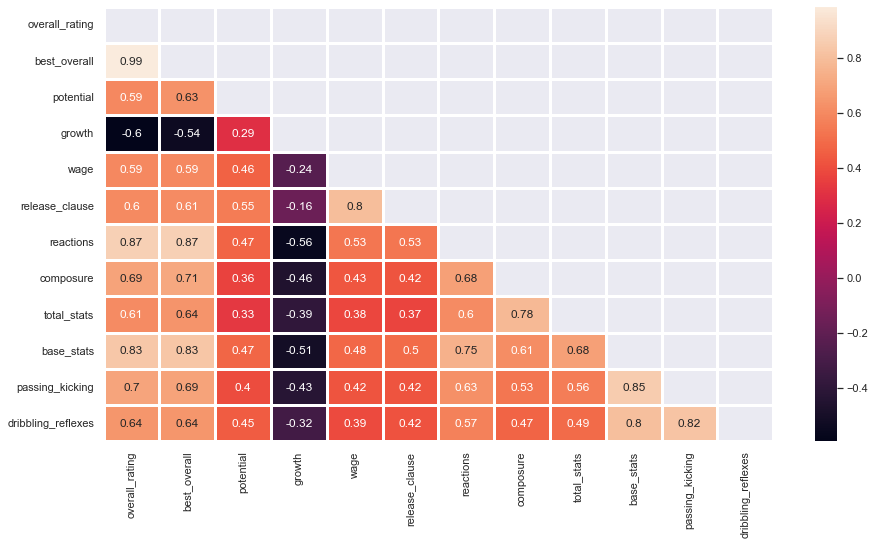

In [65]:
# the correlations matrix from high correlated columns
correlations_matrix = high_correlated.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

In [66]:
# the most correlated column with the target are: the column best_overall=0.99 and then the column reactions=0.87 and 
# the column base_stats=0.83
# the column best_overall has big correlation the column reactions = 0,87 so we have multicollinearity
# There is multicollinearity between the features as there is correlation greater than 0.85
# between best_overall and reactions = 0,87, very close to 1


In [67]:
# Multicollinearity describes the state where the independent variables used in a study exhibit a strong relationship 
# with each other.
# This can pose a problem in many cases as we would normally want our independent variables to be… independent.
# Depending on the aim and scope of our projects, it may be worthwhile to identify and address any signs of multicollinearity.
# Multicollinearity may not interfere with model performance, 
# but it does negatively impact the interpretation of the predictors used to build the model.

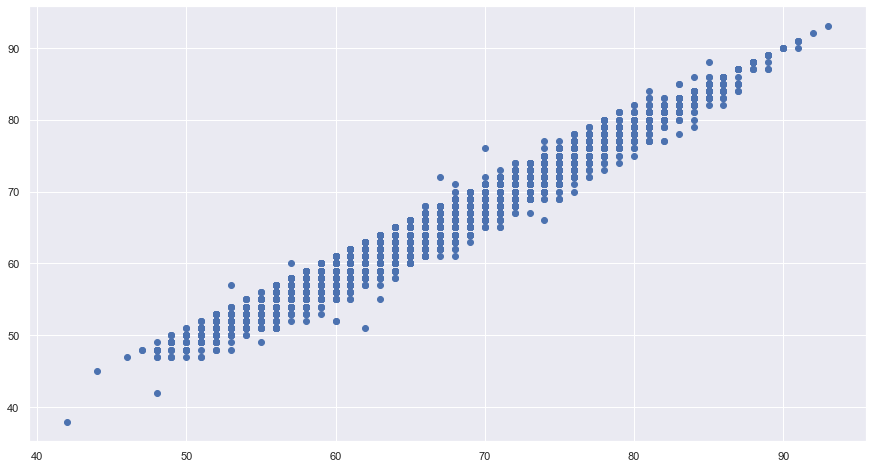

0.9858772966738395

In [68]:
# We can also see that there is high correlation between the features best_overall and overall_rating. The scatterplot proves that.
x = high_correlated['best_overall']
y = high_correlated['overall_rating']

plt.scatter(x, y)
plt.show()
x.corr(y)
# or
# sns.scatterplot(x='best_overall',y='overall_rating',data=high_correlated)
# plt.show()

In [69]:
# we will drop reactions column because of multicollinearity as it has correlation greater than 0.85 with the column best_overall

In [70]:
high_correlated_drop = high_correlated.drop(['reactions'], axis=1)
high_correlated_drop.head()

overall_rating  best_overall  potential  growth   wage  release_clause  \
0              69            71         69       0   7000             0.0   
1              71            70         71       0   7000       1100000.0   
2              71            71         71       0  15000             0.0   
3              68            70         82      14      0             0.0   
4              81            82         81       0  12000       7200000.0   

   composure  total_stats  base_stats  passing_kicking  dribbling_reflexes  
0  59.940965         1929         408               70                  71  
1  79.000000         1906         385               73                  69  
2  59.940965         1770         354               76                  77  
3  59.940965         1348         369               66                  69  
4  89.000000         2014         420               85                  85

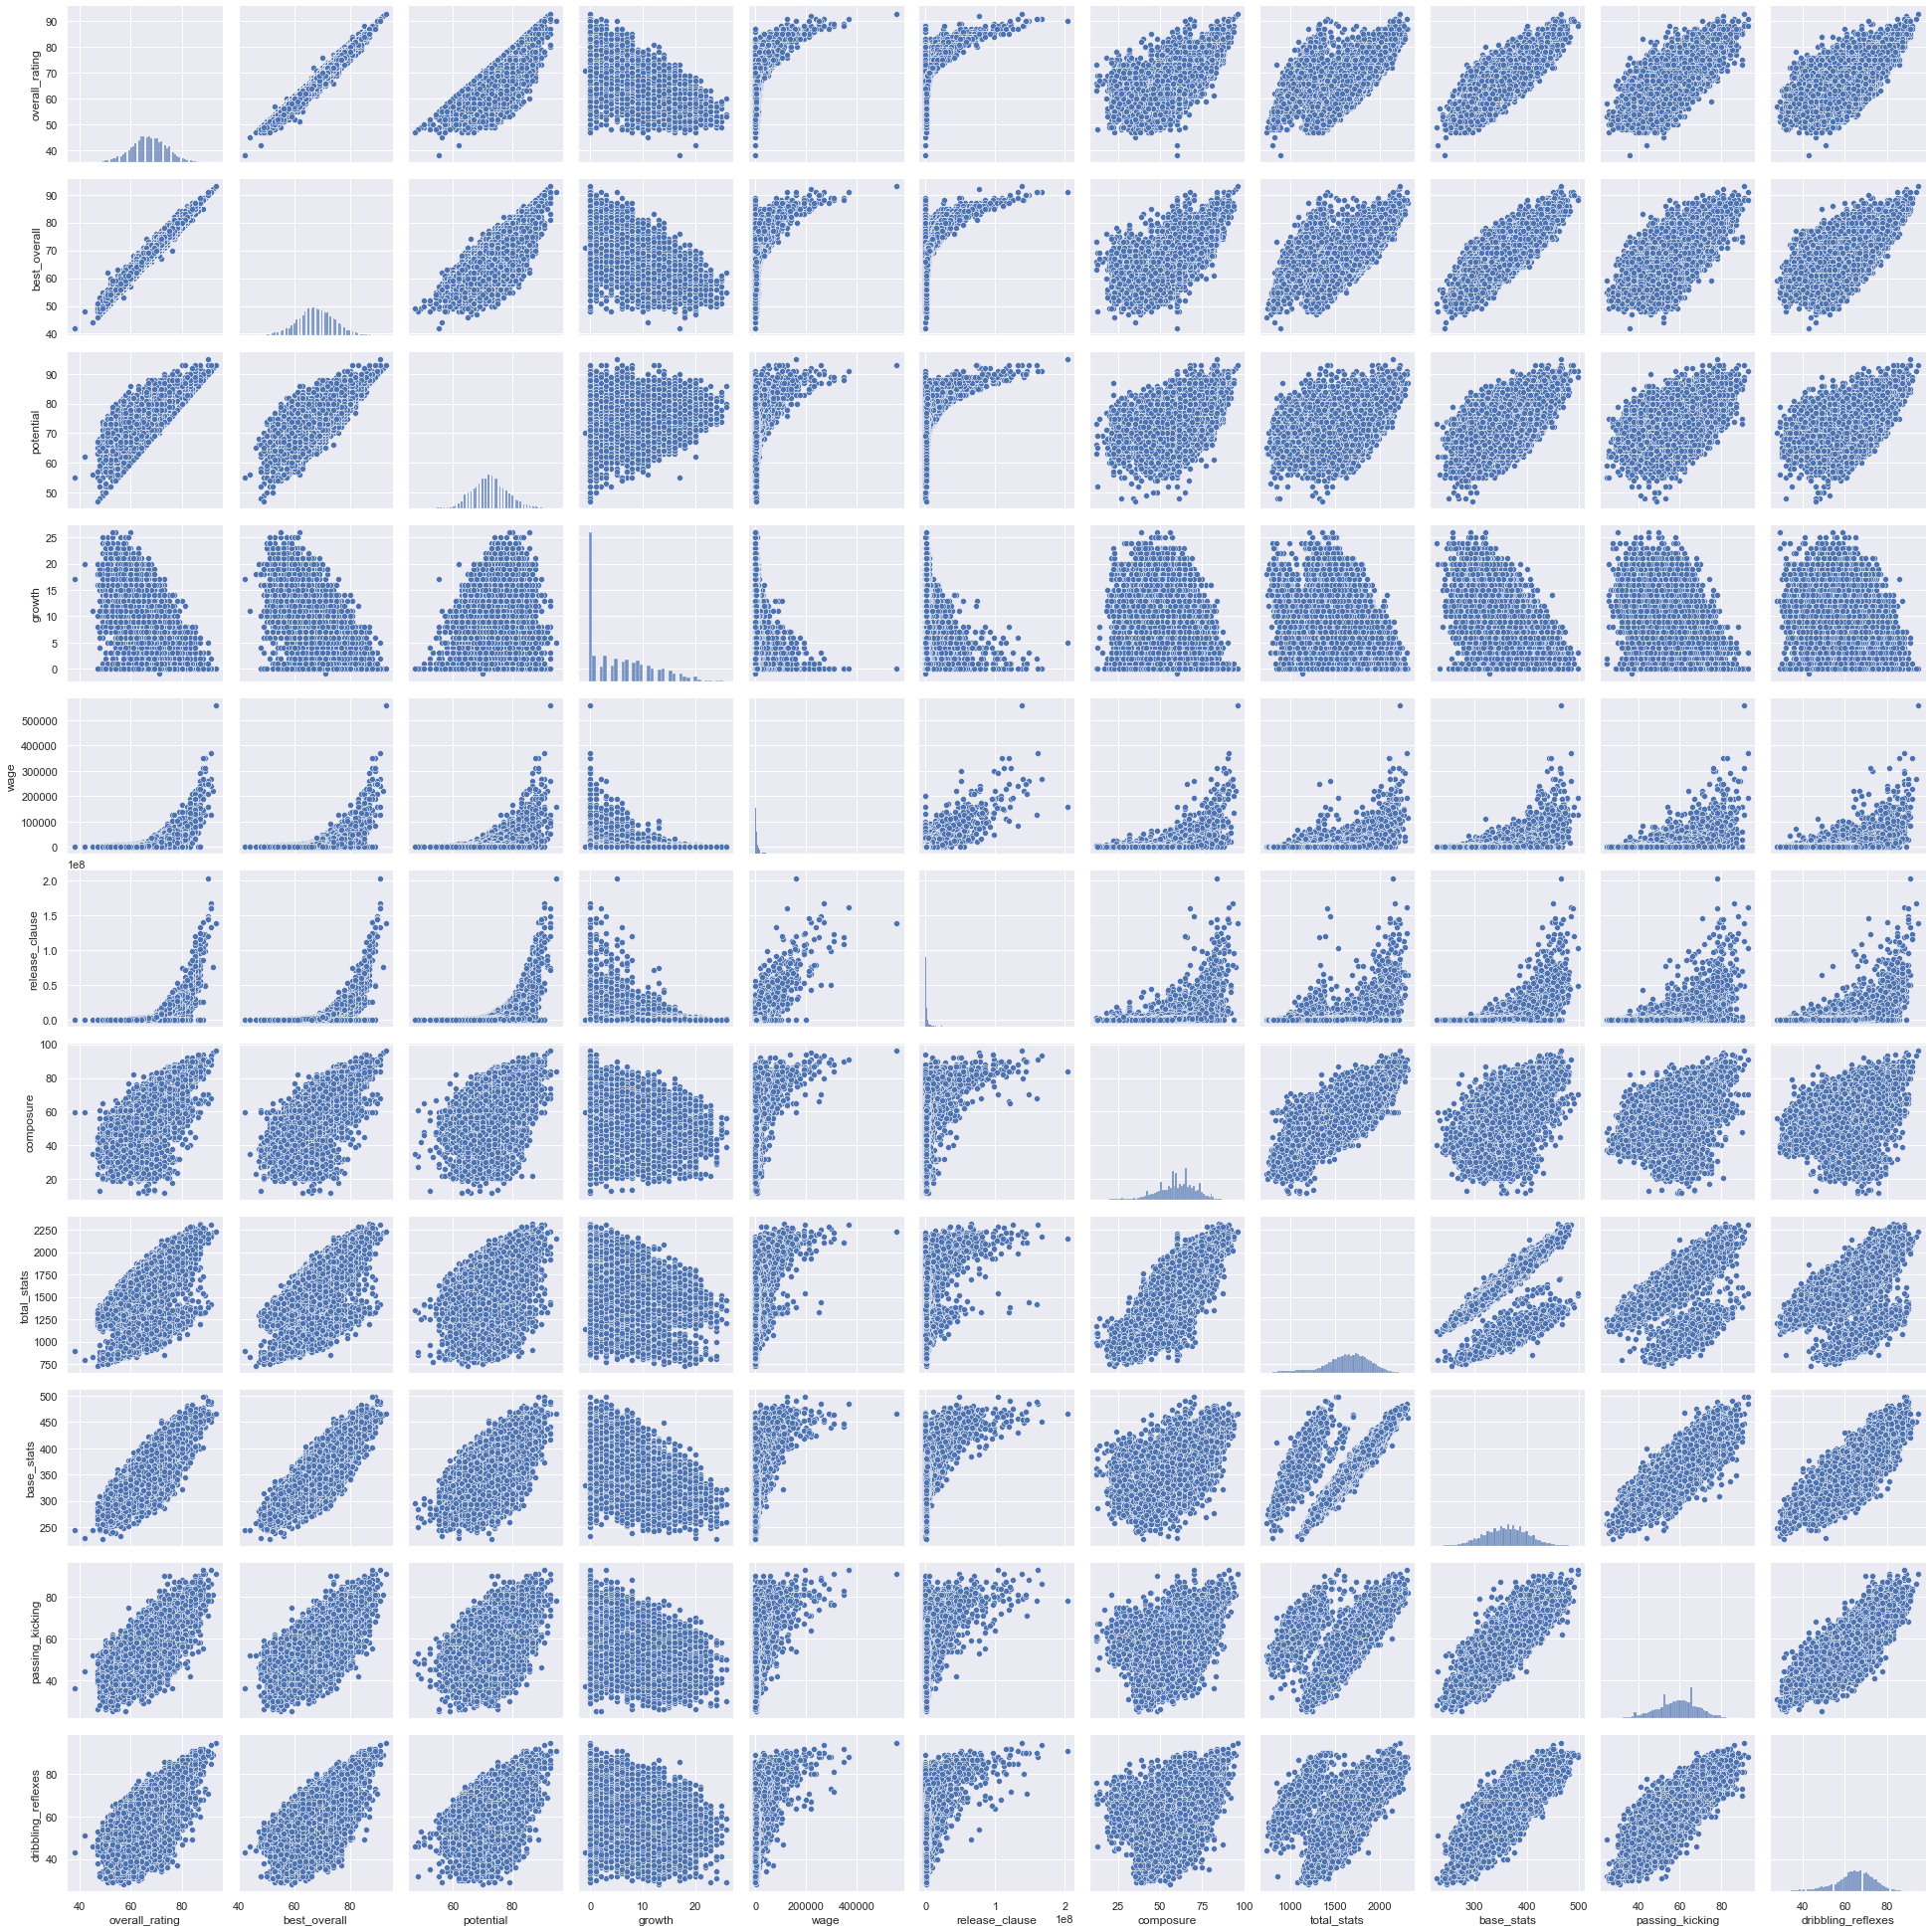

In [71]:
#different plots per numerical pairs
sns.pairplot(high_correlated_drop)

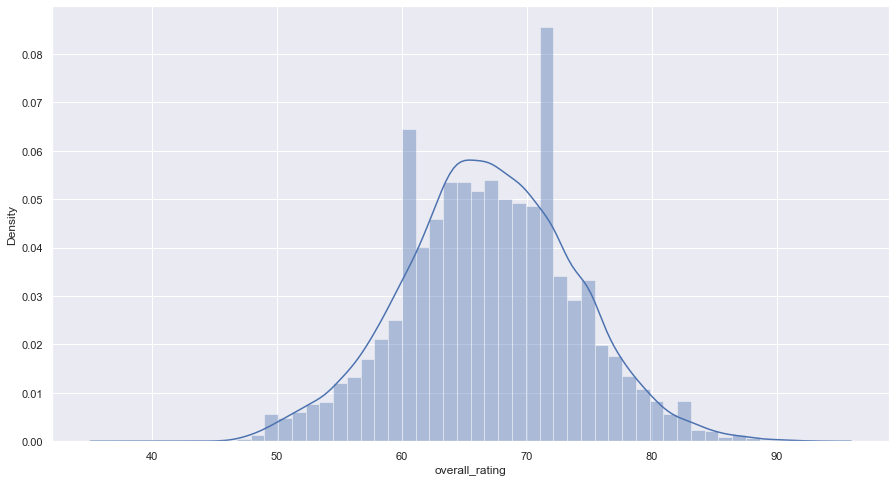

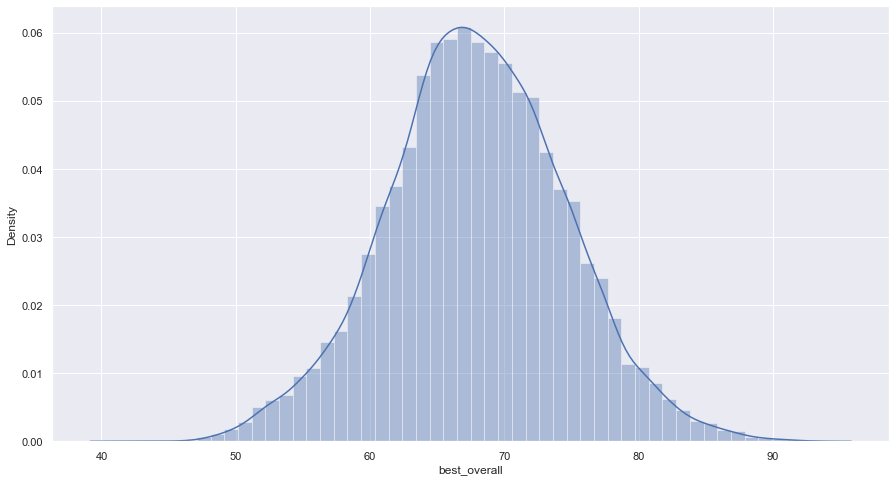

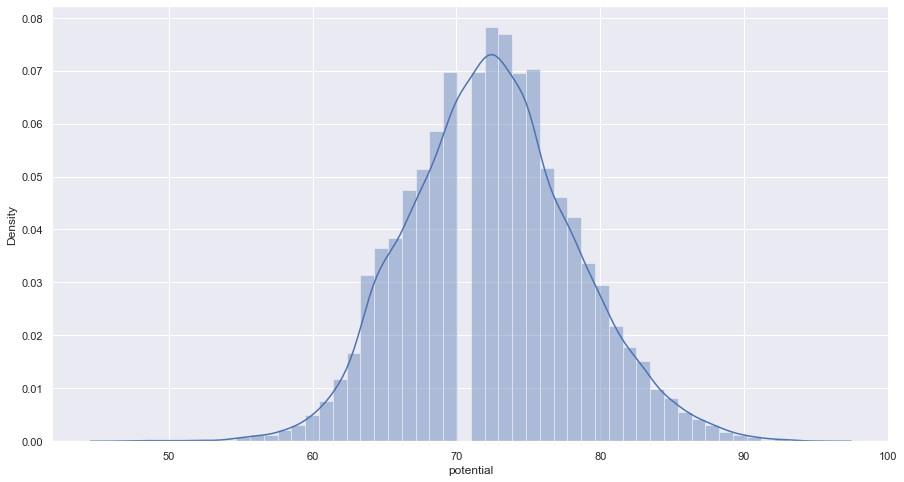

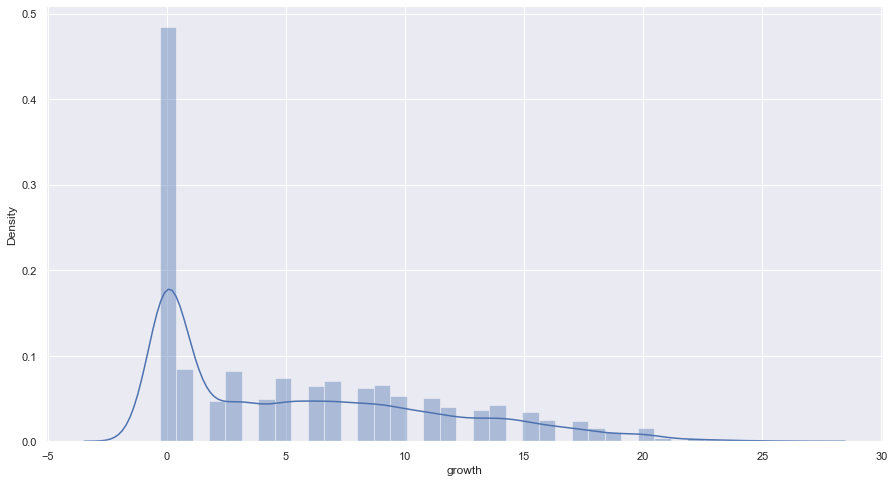

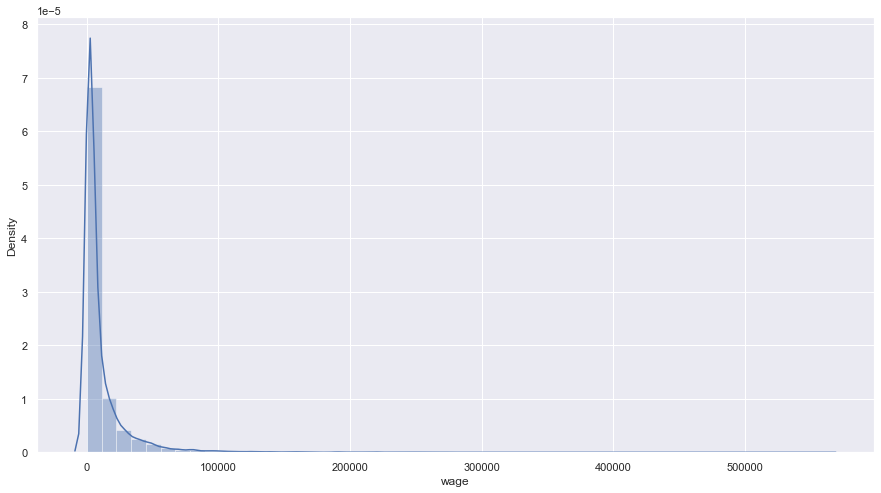

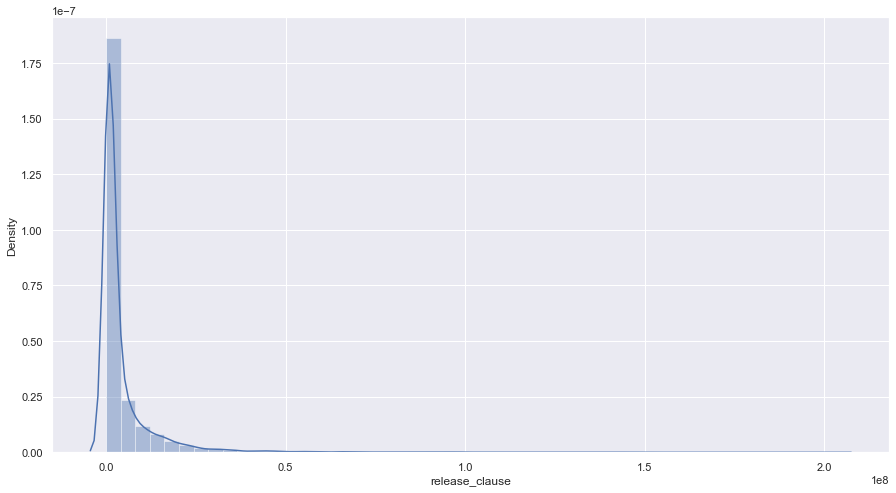

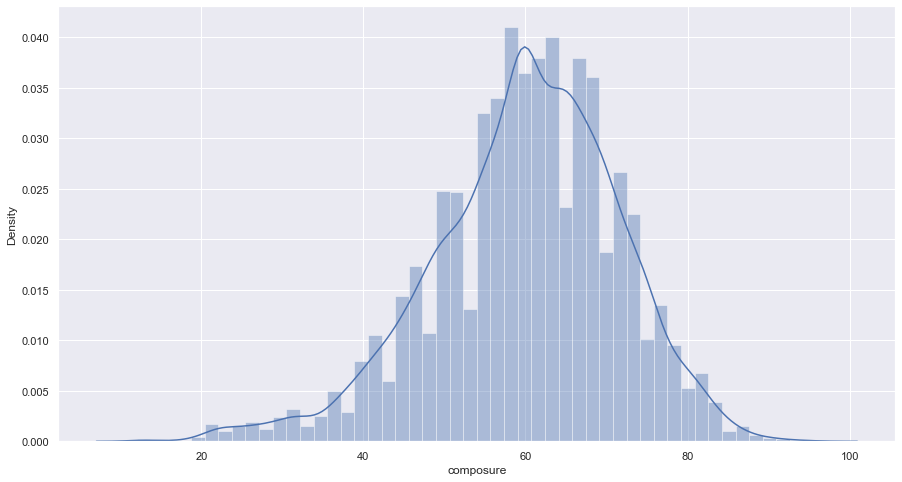

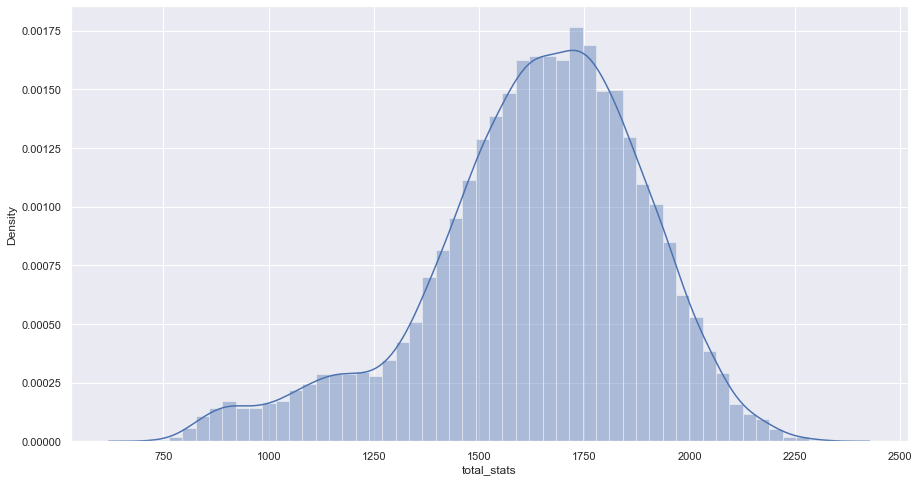

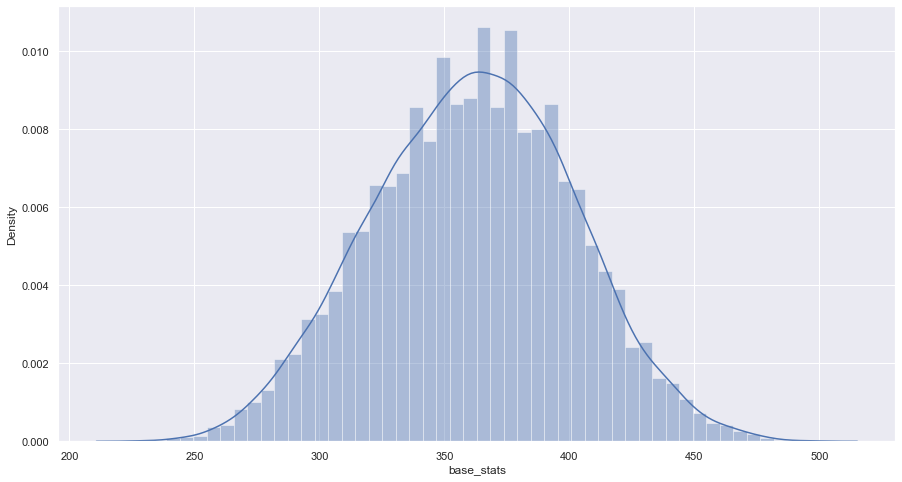

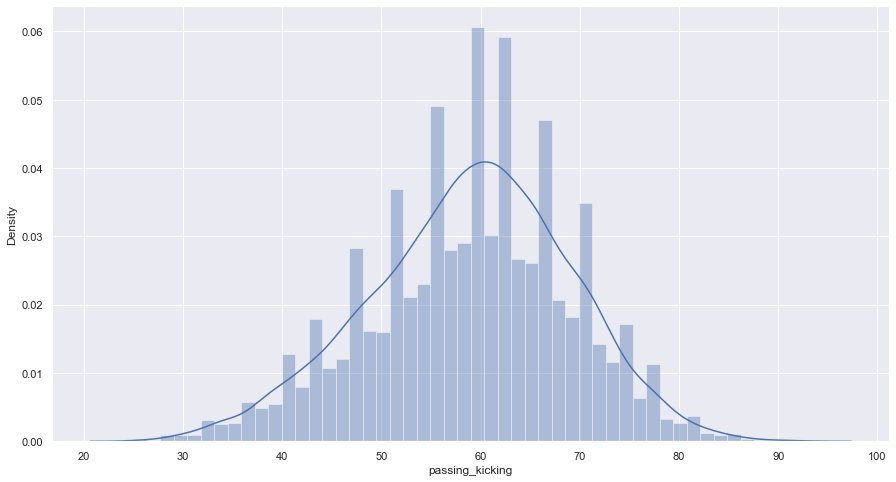

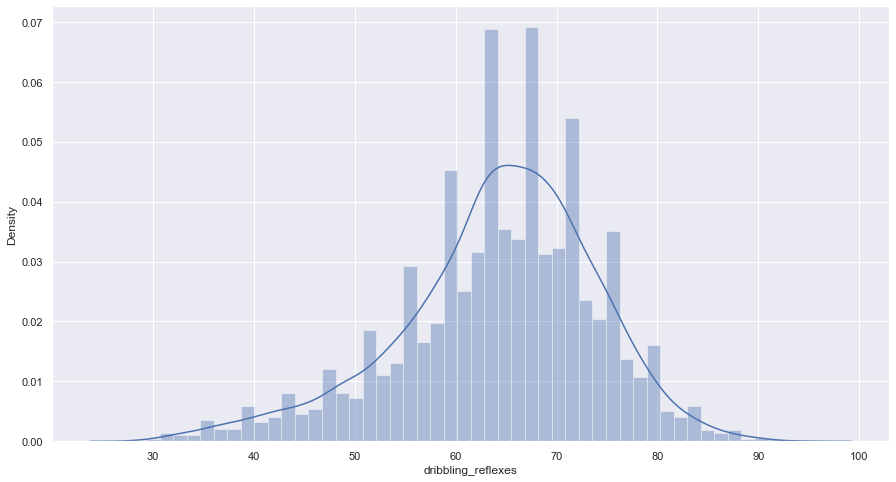

In [72]:
#show the distribution plot for every column
for col in high_correlated_drop:
    sns.distplot(high_correlated_drop[col])
    plt.show()

In [73]:
# as we already said overall_rating is the target and we continue with X-y split
y = high_correlated_drop['overall_rating']
X = high_correlated_drop.drop(['overall_rating'], axis=1)

In [74]:
y

0        69
1        71
2        71
3        68
4        81
         ..
17120    64
17121    56
17122    56
17123    62
17124    59
Name: overall_rating, Length: 17125, dtype: int64

In [75]:
X

best_overall  potential  growth   wage  release_clause  composure  \
0                71         69       0   7000             0.0  59.940965   
1                70         71       0   7000       1100000.0  79.000000   
2                71         71       0  15000             0.0  59.940965   
3                70         82      14      0             0.0  59.940965   
4                82         81       0  12000       7200000.0  89.000000   
...             ...        ...     ...    ...             ...        ...   
17120            66         69       5   2000             0.0  46.000000   
17121            58         66      10   3000        273000.0  46.000000   
17122            56         67      11   2000        273000.0  43.000000   
17123            62         73      11   3000        784000.0  54.000000   
17124            61         74      15   2000        788000.0  57.000000   

       total_stats  base_stats  passing_kicking  dribbling_reflexes  
0             1929         408               70                  71  
1             1906         385               73                  69  
2             1770         354               76                  77  
3             1348         369               66                  69  
4             2014         420               85                  85  
...            ...         ...              ...                 ...  
17120         1367         302               37                  48  
17121         1529         319               57                  56  
17122         1430         303               44                  52  
17123         1579         335               58                  59  
17124         1401         295               41                  57  

[17125 rows x 10 columns]

In [76]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
# because some of the features has no normal distribution, some features are skewed
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(high_correlated_drop)
x_normalized = MinMaxtransformer.transform(high_correlated_drop)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=high_correlated_drop.columns)
x_normalized.head()

(17125, 11)


overall_rating  best_overall  potential    growth      wage  \
0        0.563636      0.568627   0.458333  0.037037  0.012500   
1        0.600000      0.549020   0.500000  0.037037  0.012500   
2        0.600000      0.568627   0.500000  0.037037  0.026786   
3        0.545455      0.549020   0.729167  0.555556  0.000000   
4        0.781818      0.784314   0.708333  0.037037  0.021429   

   release_clause  composure  total_stats  base_stats  passing_kicking  \
0        0.000000   0.570726     0.755836    0.666667         0.661765   
1        0.005416   0.797619     0.741325    0.581481         0.705882   
2        0.000000   0.570726     0.655521    0.466667         0.750000   
3        0.000000   0.570726     0.389274    0.522222         0.602941   
4        0.035451   0.916667     0.809464    0.711111         0.882353   

   dribbling_reflexes  
0            0.641791  
1            0.611940  
2            0.731343  
3            0.611940  
4            0.850746

In [77]:
fifa_categorical

name            nationality           club best_position  \
0          G. Pasquale                  Italy        Udinese           LWB   
1          Luis García                  Spain      KAS Eupen            CM   
2              J. Cole                England  Coventry City           CAM   
3             D. Yorke  Trinidad &amp; Tobago     Sunderland            ST   
4              Iniesta                  Spain    Vissel Kobe           CAM   
...                ...                    ...            ...           ...   
17120       A. Medioub                 France     CD Tondela            CB   
17121       W. Rickard                  Wales        Burnley           CAM   
17122       C. Barrett                England        Burnley            RB   
17123   J. Gazibegović     Bosnia Herzegovina  SK Sturm Graz            RB   
17124  Pablo Rodríguez                  Spain          Lecce            ST   

           position height   foot        joined loan_date_end  \
0                LM   6'0"   Left   Jul 1, 2008       unknown   
1        CM CAM CDM  5'10"  Right  Jul 19, 2014       unknown   
2      CAM RM RW LM   5'9"  Right   Jan 7, 2016       unknown   
3           unknown  5'11"  Right       unknown       unknown   
4            CM CAM   5'7"  Right  Jul 16, 2018       unknown   
...             ...    ...    ...           ...           ...   
17120            CB   6'6"  Right  Sep 29, 2020  Jun 30, 2021   
17121        CAM CM  5'10"  Right  Aug 20, 2020       unknown   
17122            RB   5'9"  Right  Aug 20, 2020       unknown   
17123         RB LB   5'9"  Right  Sep 30, 2020       unknown   
17124            ST  5'10"  Right  Sep 30, 2020       unknown   

                   contract attacking_work_rate defensive_work_rate hits  \
0               2008 ~ 2016              Medium                High    4   
1               2014 ~ 2019              Medium              Medium    4   
2               2016 ~ 2020              Medium                 Low   11   
3                      2009             unknown             unknown    3   
4               2018 ~ 2021                High              Medium  149   
...                     ...                 ...                 ...  ...   
17120  Jun 30, 2021 On Loan              Medium              Medium    5   
17121           2020 ~ 2021              Medium              Medium    5   
17122           2020 ~ 2022              Medium              Medium    3   
17123           2020 ~ 2023                High              Medium    5   
17124           2020 ~ 2024                High              Medium    4   

         st    lw    cf    cam    lm    cm    lwb    cdm     lb    cb    gk  
0      65+0  68+0  67+0   68+0  69+0  69+0  71+-2  70+-1  70+-1  69+0  17+0  
1      67+1  67+0  68+0   70+1  68+1  70+1   62+1   66+1   60+1  60+1  17+1  
2      64+0  70+0  69+0   71+0  68+0  66+0   52+0   54+0   47+0  46+0  15+0  
3      67+0  66+0  67+0   70+0  66+0  68+0   56+0   65+0   57+0  51+0  22+0  
4      72+3  79+0  79+0  82+-1  79+2  81+0   70+3   73+3   67+3  64+3  17+3  
...     ...   ...   ...    ...   ...   ...    ...    ...    ...   ...   ...  
17120  43+2  41+0  41+0   41+2  43+2  44+2   54+2   55+2   57+2  64+2  12+2  
17121  53+2  55+0  54+0   56+2  56+2  55+2   53+2   52+2   52+2  49+2  17+2  
17122  46+2  50+0  47+0   47+2  50+2  46+2   54+2   50+2   54+2  54+2  14+2  
17123  48+2  55+0  52+0   54+2  56+2  55+2   60+2   58+2   60+2  58+2  16+2  
17124  59+2  56+0  58+0   55+2  53+2  46+2   36+2   32+2   34+2  30+2  14+2  

[17125 rows x 24 columns]

In [78]:
# Let's drop some columns we will not use
fifa_categorical1 = fifa_categorical.drop(['name','height','joined','contract','hits','st','lw','cf','cam','lm','cm','lwb','cdm','lb','cb','gk'], axis=1)
fifa_categorical1

nationality           club best_position      position  \
0                      Italy        Udinese           LWB            LM   
1                      Spain      KAS Eupen            CM    CM CAM CDM   
2                    England  Coventry City           CAM  CAM RM RW LM   
3      Trinidad &amp; Tobago     Sunderland            ST       unknown   
4                      Spain    Vissel Kobe           CAM        CM CAM   
...                      ...            ...           ...           ...   
17120                 France     CD Tondela            CB            CB   
17121                  Wales        Burnley           CAM        CAM CM   
17122                England        Burnley            RB            RB   
17123     Bosnia Herzegovina  SK Sturm Graz            RB         RB LB   
17124                  Spain          Lecce            ST            ST   

        foot loan_date_end attacking_work_rate defensive_work_rate  
0       Left       unknown              Medium                High  
1      Right       unknown              Medium              Medium  
2      Right       unknown              Medium                 Low  
3      Right       unknown             unknown             unknown  
4      Right       unknown                High              Medium  
...      ...           ...                 ...                 ...  
17120  Right  Jun 30, 2021              Medium              Medium  
17121  Right       unknown              Medium              Medium  
17122  Right       unknown              Medium              Medium  
17123  Right       unknown                High              Medium  
17124  Right       unknown                High              Medium  

[17125 rows x 8 columns]

In [79]:
# One Hot/Label Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(fifa_categorical1)
encoded = encoder.transform(fifa_categorical1).toarray()
cols = encoder.get_feature_names(input_features=fifa_categorical1.columns)
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded#.head()

nationality_Albania  nationality_Algeria  nationality_Andorra  \
0                      0.0                  0.0                  0.0   
1                      0.0                  0.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      0.0                  0.0                  0.0   
4                      0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
17120                  0.0                  0.0                  0.0   
17121                  0.0                  0.0                  0.0   
17122                  0.0                  0.0                  0.0   
17123                  0.0                  0.0                  0.0   
17124                  0.0                  0.0                  0.0   

       nationality_Angola  nationality_Antigua &amp; Barbuda  \
0                     0.0                                0.0   
1                     0.0                                0.0   
2                     0.0                                0.0   
3                     0.0                                0.0   
4                     0.0                                0.0   
...                   ...                                ...   
17120                 0.0                                0.0   
17121                 0.0                                0.0   
17122                 0.0                                0.0   
17123                 0.0                                0.0   
17124                 0.0                                0.0   

       nationality_Argentina  nationality_Armenia  nationality_Aruba  \
0                        0.0                  0.0                0.0   
1                        0.0                  0.0                0.0   
2                        0.0                  0.0                0.0   
3                        0.0                  0.0                0.0   
4                        0.0                  0.0                0.0   
...                      ...                  ...                ...   
17120                    0.0                  0.0                0.0   
17121                    0.0                  0.0                0.0   
17122                    0.0                  0.0                0.0   
17123                    0.0                  0.0                0.0   
17124                    0.0                  0.0                0.0   

       nationality_Australia  nationality_Austria  nationality_Azerbaijan  \
0                        0.0                  0.0                     0.0   
1                        0.0                  0.0                     0.0   
2                        0.0                  0.0                     0.0   
3                        0.0                  0.0                     0.0   
4                        0.0                  0.0                     0.0   
...                      ...                  ...                     ...   
17120                    0.0                  0.0                     0.0   
17121                    0.0                  0.0                     0.0   
17122                    0.0                  0.0                     0.0   
17123                    0.0                  0.0                     0.0   
17124                    0.0                  0.0                     0.0   

       nationality_Barbados  nationality_Belarus  nationality_Belgium  \
0                       0.0                  0.0                  0.0   
1                       0.0                  0.0                  0.0   
2                       0.0                  0.0                  0.0   
3                       0.0                  0.0                  0.0   
4                       0.0                  0.0                  0.0   
...                     ...                  ...                  ...   
17120                   0.0                  0.0                  0.0   

In [80]:
# Concat DataFrames
X_concat = pd.concat([x_normalized, onehot_encoded], axis=1)
X_concat

overall_rating  best_overall  potential    growth      wage  \
0            0.563636      0.568627   0.458333  0.037037  0.012500   
1            0.600000      0.549020   0.500000  0.037037  0.012500   
2            0.600000      0.568627   0.500000  0.037037  0.026786   
3            0.545455      0.549020   0.729167  0.555556  0.000000   
4            0.781818      0.784314   0.708333  0.037037  0.021429   
...               ...           ...        ...       ...       ...   
17120        0.472727      0.470588   0.458333  0.222222  0.003571   
17121        0.327273      0.313725   0.395833  0.407407  0.005357   
17122        0.327273      0.274510   0.416667  0.444444  0.003571   
17123        0.436364      0.392157   0.541667  0.444444  0.005357   
17124        0.381818      0.372549   0.562500  0.592593  0.003571   

       release_clause  composure  total_stats  base_stats  passing_kicking  \
0            0.000000   0.570726     0.755836    0.666667         0.661765   
1            0.005416   0.797619     0.741325    0.581481         0.705882   
2            0.000000   0.570726     0.655521    0.466667         0.750000   
3            0.000000   0.570726     0.389274    0.522222         0.602941   
4            0.035451   0.916667     0.809464    0.711111         0.882353   
...               ...        ...          ...         ...              ...   
17120        0.000000   0.404762     0.401262    0.274074         0.176471   
17121        0.001344   0.404762     0.503470    0.337037         0.470588   
17122        0.001344   0.369048     0.441009    0.277778         0.279412   
17123        0.003860   0.500000     0.535016    0.396296         0.485294   
17124        0.003880   0.535714     0.422713    0.248148         0.235294   

       dribbling_reflexes  nationality_Albania  nationality_Algeria  \
0                0.641791                  0.0                  0.0   
1                0.611940                  0.0                  0.0   
2                0.731343                  0.0                  0.0   
3                0.611940                  0.0                  0.0   
4                0.850746                  0.0                  0.0   
...                   ...                  ...                  ...   
17120            0.298507                  0.0                  0.0   
17121            0.417910                  0.0                  0.0   
17122            0.358209                  0.0                  0.0   
17123            0.462687                  0.0                  0.0   
17124            0.432836                  0.0                  0.0   

       nationality_Andorra  nationality_Angola  \
0                      0.0                 0.0   
1                      0.0                 0.0   
2                      0.0                 0.0   
3                      0.0                 0.0   
4                      0.0                 0.0   
...                    ...                 ...   
17120                  0.0                 0.0   
17121                  0.0                 0.0   
17122                  0.0                 0.0   
17123                  0.0                 0.0   
17124                  0.0                 0.0   

       nationality_Antigua &amp; Barbuda  nationality_Argentina  \
0                                    0.0                    0.0   
1                                    0.0                    0.0   
2                                    0.0                    0.0   
3                                    0.0                    0.0   
4                                    0.0                    0.0   
...                                  ...                    ...   
17120                                0.0                    0.0   
17121                                0.0                    0.0   
17122                                0.0                    0.0   
17123                                0.0                    0.0   
17124                                0

In [81]:
# Linear Regression
# Train-test split
# independent variables or predictors
X1=X_concat
X1.shape

(17125, 1775)

In [82]:
# dependent variables or responses
# y = high_correlated_drop['overall_rating']
y
y.shape

(17125,)

In [83]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [84]:
# Apply linear regression. Fit the model in Supervised learning. 
# Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model = LinearRegression()
model.fit(X1_train, y_train)
# model.fit(X1, y)

LinearRegression()

In [85]:
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(13700, 1775)
(3425, 1775)
(13700,)
(3425,)


In [86]:
# Model Validation
# Description

In [87]:
# Let's find the R2 score (Coefficient of determination) 
# The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
from sklearn.metrics import r2_score
predictions = model.predict(X1_test)
r2_score(y_test, predictions) # or model.score(X1_test, y_test) An unbiased estimation of the predictive performance of your model is based on test data

0.9849435007015904

In [88]:
# MSE (Mean Squared Error) represents the difference between the original and predicted values extracted
# by squared the average difference over the data set.
mean_squared_error(y_test, predictions, squared=False)

0.8442510207408779

In [89]:
# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
import math
math.sqrt(mean_squared_error(y_test, predictions, squared=False))

0.9188313342180261

In [90]:
# MAE (Mean absolute error) represents the difference between the original and predicted values extracted 
#by averaged the absolute difference over the data set.
mean_absolute_error(y_test, predictions)

0.044488529271270554

In [91]:
# bias 𝑏₀
print('intercept:', model.intercept_)

intercept: 112.84915371026261


In [92]:
# array containing 𝑏₁, 𝑏₂, ... respectively
print('slope:', model.coef_)

slope: [-3.56459481e+02 -6.79278855e-12  3.59091911e+02 ... -5.68434189e-14
  5.68434189e-14 -8.67087485e+00]


In [93]:
# let's add the column 'reactions' and check what happened
y2 = high_correlated['overall_rating']
X2 = high_correlated.drop(['overall_rating'], axis=1)

In [94]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(high_correlated)
x2_normalized = MinMaxtransformer.transform(high_correlated)
print(x2_normalized.shape)
x2_normalized = pd.DataFrame(x2_normalized,columns=high_correlated.columns)
x2_normalized.head()

(17125, 12)


overall_rating  best_overall  potential    growth      wage  \
0        0.563636      0.568627   0.458333  0.037037  0.012500   
1        0.600000      0.549020   0.500000  0.037037  0.012500   
2        0.600000      0.568627   0.500000  0.037037  0.026786   
3        0.545455      0.549020   0.729167  0.555556  0.000000   
4        0.781818      0.784314   0.708333  0.037037  0.021429   

   release_clause  reactions  composure  total_stats  base_stats  \
0        0.000000   0.625000   0.570726     0.755836    0.666667   
1        0.005416   0.569444   0.797619     0.741325    0.581481   
2        0.000000   0.486111   0.570726     0.655521    0.466667   
3        0.000000   0.430556   0.570726     0.389274    0.522222   
4        0.035451   0.708333   0.916667     0.809464    0.711111   

   passing_kicking  dribbling_reflexes  
0         0.661765            0.641791  
1         0.705882            0.611940  
2         0.750000            0.731343  
3         0.602941            0.611940  
4         0.882353            0.850746

In [95]:
# Concat DataFrames
X2_concat = pd.concat([x2_normalized, onehot_encoded], axis=1)
X2_concat

overall_rating  best_overall  potential    growth      wage  \
0            0.563636      0.568627   0.458333  0.037037  0.012500   
1            0.600000      0.549020   0.500000  0.037037  0.012500   
2            0.600000      0.568627   0.500000  0.037037  0.026786   
3            0.545455      0.549020   0.729167  0.555556  0.000000   
4            0.781818      0.784314   0.708333  0.037037  0.021429   
...               ...           ...        ...       ...       ...   
17120        0.472727      0.470588   0.458333  0.222222  0.003571   
17121        0.327273      0.313725   0.395833  0.407407  0.005357   
17122        0.327273      0.274510   0.416667  0.444444  0.003571   
17123        0.436364      0.392157   0.541667  0.444444  0.005357   
17124        0.381818      0.372549   0.562500  0.592593  0.003571   

       release_clause  reactions  composure  total_stats  base_stats  \
0            0.000000   0.625000   0.570726     0.755836    0.666667   
1            0.005416   0.569444   0.797619     0.741325    0.581481   
2            0.000000   0.486111   0.570726     0.655521    0.466667   
3            0.000000   0.430556   0.570726     0.389274    0.522222   
4            0.035451   0.708333   0.916667     0.809464    0.711111   
...               ...        ...        ...          ...         ...   
17120        0.000000   0.333333   0.404762     0.401262    0.274074   
17121        0.001344   0.416667   0.404762     0.503470    0.337037   
17122        0.001344   0.486111   0.369048     0.441009    0.277778   
17123        0.003860   0.444444   0.500000     0.535016    0.396296   
17124        0.003880   0.402778   0.535714     0.422713    0.248148   

       passing_kicking  dribbling_reflexes  nationality_Albania  \
0             0.661765            0.641791                  0.0   
1             0.705882            0.611940                  0.0   
2             0.750000            0.731343                  0.0   
3             0.602941            0.611940                  0.0   
4             0.882353            0.850746                  0.0   
...                ...                 ...                  ...   
17120         0.176471            0.298507                  0.0   
17121         0.470588            0.417910                  0.0   
17122         0.279412            0.358209                  0.0   
17123         0.485294            0.462687                  0.0   
17124         0.235294            0.432836                  0.0   

       nationality_Algeria  nationality_Andorra  nationality_Angola  \
0                      0.0                  0.0                 0.0   
1                      0.0                  0.0                 0.0   
2                      0.0                  0.0                 0.0   
3                      0.0                  0.0                 0.0   
4                      0.0                  0.0                 0.0   
...                    ...                  ...                 ...   
17120                  0.0                  0.0                 0.0   
17121                  0.0                  0.0                 0.0   
17122                  0.0                  0.0                 0.0   
17123                  0.0                  0.0                 0.0   
17124                  0.0                  0.0                 0.0   

       nationality_Antigua &amp; Barbuda  nationality_Argentina  \
0                                    0.0                    0.0   
1                                    0.0                    0.0   
2                                    0.0                    0.0   
3                                    0.0                    0.0   
4                                    0.0                    0.0   
...                                  ...                    ...   
17120                                0.0                    0.0   
17121                                0.0                    0.0   
17122                                0.0

In [96]:
# Linear Regression
# Train-test split
# independent variables or predictors
X2=X2_concat
X2.shape

(17125, 1776)

In [97]:
# dependent variables or responses
y2
y2.shape

(17125,)

In [98]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [99]:
# Apply linear regression. Fit the model in Supervised learning. 
# Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model = LinearRegression()
model.fit(X2_train, y2_train)
# model.fit(X2, y)

LinearRegression()

In [100]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(13700, 1776)
(3425, 1776)
(13700,)
(3425,)


In [101]:
# Let's find the new R2 score (Coefficient of determination) 
# The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
from sklearn.metrics import r2_score
predictions = model.predict(X2_test)
r2_score(y2_test, predictions) # or model.score(X2_test, y_test) An unbiased estimation of the predictive performance of your model is based on test data
# if we add the column 'reactions', the correlation increases but we have the issue of multicolinearity

0.9999896263296735

In [102]:
# as we can notice the r2 score is now 0.999905980618571 because we add the column 'reactions' 
# the correlation between the column 'best_overall' and 'reactions' is strong, so we have signs for multicollinearity 
# and the column 'reactions' is not so independent as we like to be in our prediction

In [103]:
fifa_renamed.head(5)
# we can also notice that the columns potential, growth and overall_rating are related with the relationship
# potential = overall_rating + growth <=> overall_rating = potential-growth. Let's create a new column with the summary overall_rating + growth
fifa_renamed['overall_rating_and_growth']=fifa_renamed['overall_rating']+fifa_renamed['growth']
fifa_renamed['overall_rating_and_growth']
# checking what we suspect
similar = fifa_renamed['overall_rating_and_growth'] == fifa_renamed['potential']
similar.value_counts()

True    17125
dtype: int64

In [104]:
# drop the column 'overall_rating_and_growth', we previously created
fifa_renamed = fifa_renamed.drop(['overall_rating_and_growth'], axis=1) 

In [105]:
# we will investigate if the most paid players have high overall_rating

In [106]:
# Let's find the top 10 most valuable players
top10_most_valuable_players = fifa_renamed[['name','age','overall_rating','best_overall','potential','value', 'wage', 'release_clause']].nlargest(10, ['value']).set_index('overall_rating')
top10_most_valuable_players

name  age  best_overall  potential        value  \
overall_rating                                                              
90                   K. Mbappé   21            91         95  105500000.0   
91                   Neymar Jr   28            91         91   90000000.0   
91                K. De Bruyne   29            91         91   87000000.0   
91              R. Lewandowski   31            91         91   80000000.0   
90                     S. Mané   28            90         90   78000000.0   
90                    M. Salah   28            90         90   78000000.0   
90                 V. van Dijk   28            90         91   75500000.0   
91                    J. Oblak   27            91         93   75000000.0   
88                 R. Sterling   25            88         90   72500000.0   
88                     H. Kane   26            88         89   71000000.0   

                  wage  release_clause  
overall_rating                          
90              160000     203100000.0  
91              270000     166500000.0  
91              370000     161000000.0  
91              240000     132000000.0  
90              250000     144300000.0  
90              250000     144300000.0  
90              210000     145300000.0  
91              125000     159400000.0  
88              270000     139600000.0  
88              220000     140200000.0

In [107]:
# Let's find the top 10 most paid players
top10_most_paid_players = fifa_renamed[['name','age','overall_rating','best_overall','potential','value', 'wage', 'release_clause', 'international_reputation']].nlargest(10, ['wage']).set_index('international_reputation')
top10_most_paid_players

name  age  overall_rating  best_overall  \
international_reputation                                                    
5                             L. Messi   33              93            93   
4                         K. De Bruyne   29              91            91   
4                           K. Benzema   32              89            89   
4                            E. Hazard   29              88            88   
4                             T. Kroos   30              88            88   
3                             Casemiro   28              89            89   
4                            S. Agüero   32              89            89   
4                         Sergio Ramos   34              89            89   
4                         A. Griezmann   29              87            87   
5                            Neymar Jr   28              91            91   

                          potential       value    wage  release_clause  
international_reputation                                                 
5                                93  67500000.0  560000     138400000.0  
4                                91  87000000.0  370000     161000000.0  
4                                89  53000000.0  350000     108700000.0  
4                                88  58000000.0  350000     118900000.0  
4                                88  55000000.0  310000     112800000.0  
3                                89  59500000.0  310000     122000000.0  
4                                89  53000000.0  300000      98100000.0  
4                                89  24500000.0  300000      50200000.0  
4                                87  50500000.0  290000     103500000.0  
5                                91  90000000.0  270000     166500000.0

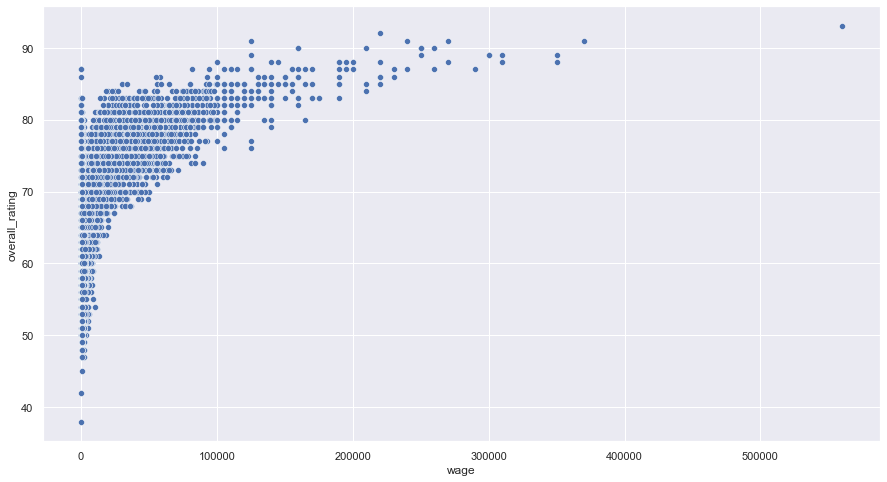

In [108]:
# scatterplot between 'wage' and 'overall_rating'
sns.scatterplot(x='wage',y='overall_rating',data=fifa_renamed)
plt.show()
# there are some players with high overall rating and really high wages and some others with high overall rating but medium wages

## looking for talents, scouting by big overall rating, small wage and age under 30 years old

In [109]:
# we can notice in the previous scatterplot that there are some players who have big overall_rating and small-medium wage, 
# let's find some of them who are also under 30 years old
# wage also > 0 to avoid retired players
good_players_low_paid = fifa_renamed[(fifa_renamed['overall_rating'] > 80) & (fifa_renamed['wage'] < 18000) & (fifa_renamed['wage'] >0) & (fifa_renamed['age'] < 30)]
good_players_low_paid.sort_values(by=["release_clause",'overall_rating','wage'], ascending=[True,False,True])
# if we were managers our target should be these players who have high overall rating, low wage and their age are under 30
# we have also sorted the players according to release clause, so for instance if we buy the first three players,
# we do not have to pay money for release clause, their wage is really low in relation to their overall rating.
# so the club has a lot of advantages by buying these players

name  age  overall_rating nationality            club  \
4872     J. Martínez   27              81   Venezuela  Atlanta United   
5582  O. Vlachodimos   26              81      Greece          Greece   
7277         Everton   24              81      Brazil      SL Benfica   
6965       Pau López   25              83       Spain            Roma   

      best_overall best_position position  potential height  weight   foot  \
4872            82            ST       ST         82   5'7"      68  Right   
5582            81            GK       GK         86   6'2"      77  Right   
7277            82           CAM       LM         86   5'9"      72  Right   
6965            83            GK       GK         88   6'2"      77   Left   

      growth        joined loan_date_end       value   wage  release_clause  \
4872       1  Mar 22, 2017       unknown  21000000.0  14000      33100000.0   
5582       5   Jul 1, 2018       unknown  17500000.0  14000      36300000.0   
7277       5  Aug 14, 2020       unknown  24000000.0  17000      49800000.0   
6965       5  Jul 10, 2019       unknown  25500000.0    500      55500000.0   

                    contract  attacking  crossing  finishing  \
4872             2017 ~ 2023        359        53         85   
5582  SL Benfica 2018 ~ 2024         81        15         12   
7277             2020 ~ 2025        341        74         76   
6965             2019 ~ 2024        113        24         19   

      heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
4872                77             69     75.0    335         76   68.0   
5582                13             27     14.0     90         13   17.0   
7277                45             75     71.0    367         87   76.0   
6965                15             38     17.0    119         18   23.0   

      fk_accuracy  long_passing  ball_control  movement  acceleration  \
4872           57            55            79       441            87   
5582           13            24            23       274            42   
7277           56            67            81       425            89   
6965           21            41            16       268            45   

      sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
4872            90     91.0         81     92.0    390          84     90.0   
5582            44     67.0         83     38.0    247          50     74.0   
7277            84     87.0         81     84.0    346          75     61.0   
6965            52     40.0         74     57.0    242          59     71.0   

      stamina  strength  long_shots  mentality  aggression  interceptions  \
4872       72        78          66        308          66           20.0   
5582       39        68          16        133          32           23.0   
7277       75        60          75        301          43           36.0   
6965       42        52          18        162          39           16.0   

      positioning  vision  penalties  composure  defending  marking  \
4872         85.0    58.0         79       75.0         55       20   
5582         14.0    46.0         18       56.0         43       17   
7277         83.0    75.0         64       79.0         87       25   
6965         20.0    62.0         25       62.0         50       19   

      standing_tackle  sliding_tackle  goalkeeping  gk_diving  gk_handling  \
4872               20            15.0           60         12           14   
5582               14            12.0          390         84           76   
7277               33            29.0           73         13           16   
6965               20            11.0          410         82           83   

      gk_kicking  gk_positioning  gk_reflexes  total_stats  base_stats  \
4872          14              12            8         1948         409   
5582          67              77           86         1258         433   
7277          15              14           15    

In [110]:
# let's also find bad players by wage (with medium-high wage)
bad_players = fifa_renamed[(fifa_renamed['overall_rating'] < 70) & (fifa_renamed['wage'] > 5000)]
bad_players.sort_values(by="age", ascending=True)
# our advice to the scout team is not to scout players like them, because they are expensive according to our budget
# and their performance is not so good unless their growth is really high 

name  age  overall_rating nationality  \
12675  César Gelabert   16              57       Spain   
14870     Fábio Silva   17              69    Portugal   
15387        T. Mengi   18              65     England   
12332   Arnau Puigmal   18              63       Spain   
15384   A. Kalimuendo   18              65      France   
...               ...  ...             ...         ...   
281          T. Berni   37              64       Italy   
460          S. Abreu   37              68     Uruguay   
126          J. Ángel   38              68    Colombia   
760         Zheng Zhi   39              68    China PR   
98       Manuel Pablo   39              67       Spain   

                                 club  best_overall best_position   position  \
12675                     Real Madrid            57            RM  CAM LM ST   
14870         Wolverhampton Wanderers            71            ST         ST   
15387               Manchester United            67            CB         CB   
12332               Manchester United            66           CAM      CM RB   
15384             Paris Saint-Germain            67            ST         ST   
...                               ...           ...           ...        ...   
281                             Inter            64            GK    unknown   
460                   Rosario Central            68            ST    unknown   
126                 Atlético Nacional            68            ST    unknown   
760    Guangzhou Evergrande Taobao FC            68           CDM     CDM CM   
98             Deportivo de La Coruña            71           CDM    unknown   

       potential height  weight   foot  growth        joined loan_date_end  \
12675         82   6'0"      72  Right      25  Jul 15, 2015       unknown   
14870         85   6'1"      74  Right      16   Sep 5, 2020       unknown   
15387         83   6'0"      78  Right      18  Sep 20, 2019       unknown   
12332         81   5'8"      64  Right      18  Jan 12, 2018       unknown   
15384         80  5'10"      78  Right      15   Jul 8, 2019       unknown   
...          ...    ...     ...    ...     ...           ...           ...   
281           64   6'1"      79  Right       0   Jul 5, 2017       unknown   
460           68   6'4"      84   Left       0   Aug 1, 2013       unknown   
126           68   6'1"      82  Right       0   Jan 1, 2013       unknown   
760           68  5'11"      74  Right       0   Jul 1, 2010       unknown   
98            67   5'9"      79  Right       0   Jul 1, 1998       unknown   

           value   wage  release_clause     contract  attacking  crossing  \
12675   230000.0   6000        702000.0  2015 ~ 2018        216        41   
14870  2100000.0   7000       5300000.0  2020 ~ 2025        289        41   
15387  1000000.0   6000       2500000.0  2019 ~ 2021        232        42   
12332   750000.0   6000       1900000.0  2018 ~ 2021        269        64   
15384  1100000.0   7000       2700000.0  2019 ~ 2022        278        38   
...          ...    ...             ...          ...        ...       ...   
281      45000.0   8000         77000.0  2017 ~ 2020         77        11   
460     100000.0   7000             0.0  2013 ~ 2015        348        57   
126     100000.0  10000             0.0  2013 ~ 2014        331        56   
760     130000.0   6000        208000.0  2010 ~ 2020        321        61   
98           0.0   6000             0.0  1998 ~ 2016        297        78   

       finishing  heading_accuracy  short_passing  volleys  skill  dribbling  \
12675         63                32             45     35.0    259         64   
14870         70                62             46     70.0    266         73   
15387         33                65             63     29.0    257         57   
12332         52                45             65     43.0    316         64   
15384         68                60             58     54.0    261         64   
...          ... 

In [111]:
# good players by nationality and age, talents
good_players_by_nationality = fifa_renamed[(fifa_renamed['overall_rating'] > 75) & (fifa_renamed['age'] < 25)]
good_players_by_nationality.sort_values(by="nationality", ascending=True)
good_players_by_nationality.nationality.value_counts()
# we also advice our scouting team to scout players especially to these countries because are countries with a lot of
# talented newbies 

Brazil             53
France             40
Spain              36
England            31
Germany            21
Portugal           17
Argentina          16
Netherlands        14
Italy              11
Uruguay            10
Turkey              8
Nigeria             7
Morocco             6
Denmark             5
Croatia             4
Switzerland         4
Norway              4
Ivory Coast         4
Austria             4
Wales               3
Senegal             3
Colombia            3
Cameroon            3
Mexico              3
Belgium             3
Russia              3
Ukraine             3
Serbia              2
Sweden              2
Canada              2
United States       2
Mali                2
Scotland            2
Ghana               2
Algeria             2
Burkina Faso        2
Czech Republic      1
Zambia              1
Ecuador             1
North Macedonia     1
Paraguay            1
Poland              1
Iran                1
Korea Republic      1
Japan               1
Greece    

<AxesSubplot:ylabel='nationality'>

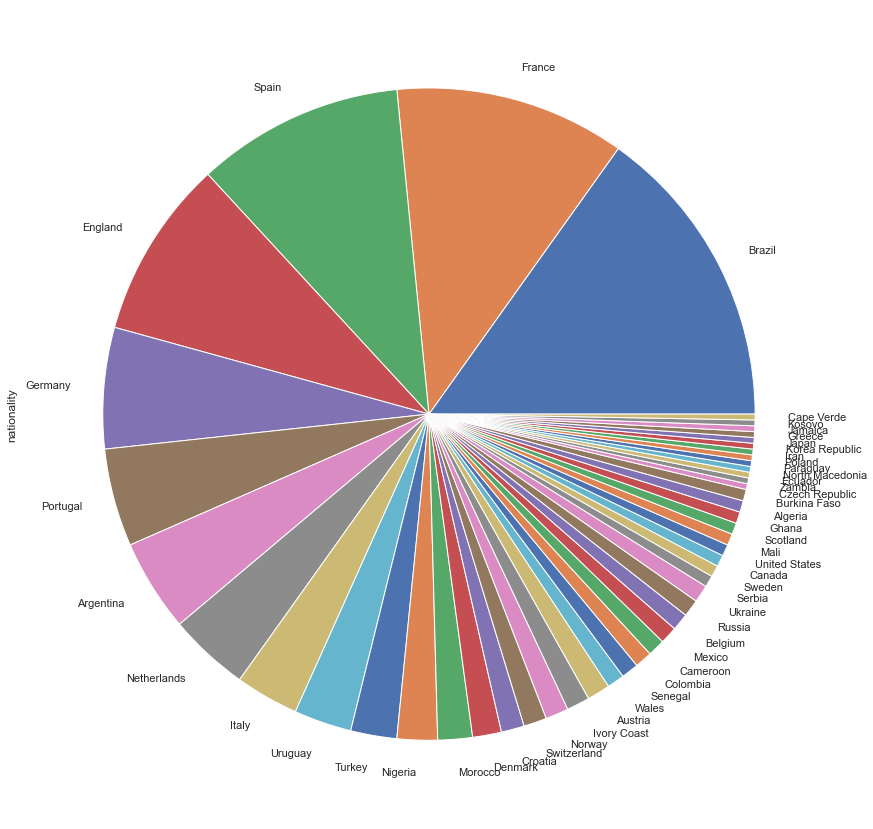

In [112]:
# pie chart for how many good players by nationality exist
good_players_by_nationality.nationality.value_counts().plot(kind='pie', figsize=(15,15))
# almost the half talented players are from 5 countries, so let's target players from these countries more

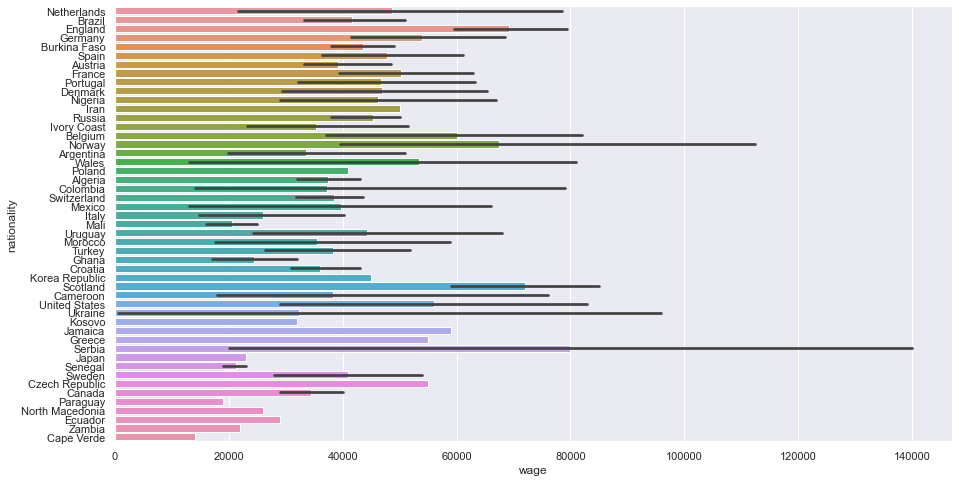

In [113]:
# Barplot of good players by nationality and wage
# On the one hand African good players tend to be cheaper than the rest of the players, on the other hand North European good players
# are very expensive in relation with players from other countries.
# We suggest scout team to look more for good and cheap players in African countries and then in Latin America countries
sns.barplot(x="wage", y="nationality", data=good_players_by_nationality)
plt.show()

In [114]:
# let's find some cheap good players and where they come from
good_players_by_nationality_cheaper=good_players_by_nationality[(good_players_by_nationality['wage'] < 22000) & (good_players_by_nationality['wage'] > 0) & (good_players_by_nationality['release_clause'] < 1000000)]
good_players_by_nationality_cheaper.sort_values(by="value", ascending=True)
# we have a sample to which countries we should target if we have low budget

name  age  overall_rating nationality         club  best_overall  \
10089  F. Müller   22              76     Germany  SC Freiburg            76   
7160     Y. Koné   24              76        Mali     Elche CF            76   
7803     Vallejo   23              76       Spain   Granada CF            78   
9321   A. Lafont   21              78      France    FC Nantes            78   
7607    C. Pavón   24              79   Argentina    LA Galaxy            80   

      best_position  position  potential height  weight   foot  growth  \
10089            GK        GK         83   6'4"      84   Left       7   
7160             LB        LB         81   5'9"      71   Left       5   
7803             CB        CB         82   6'0"      78  Right       6   
9321             GK        GK         84   6'4"      82  Right       6   
7607            CAM  LW RW LM         85   5'9"      78  Right       6   

             joined loan_date_end       value   wage  release_clause  \
10089   Jul 1, 2016  Jun 30, 2021   8000000.0  15000             0.0   
7160   Jul 11, 2019  Jun 30, 2021   9000000.0  16000             0.0   
7803   Jul 31, 2015  Jun 30, 2021   9500000.0  20000             0.0   
9321    Jul 2, 2018  Jun 30, 2021  11000000.0  14000             0.0   
7607   Jul 14, 2014  Dec 31, 2020  17500000.0  11000             0.0   

                   contract  attacking  crossing  finishing  heading_accuracy  \
10089  Jun 30, 2021 On Loan         76        12         11                11   
7160   Jun 30, 2021 On Loan        280        74         42                57   
7803   Jun 30, 2021 On Loan        266        41         44                74   
9321   Jun 30, 2021 On Loan         95        13          6                13   
7607   Dec 31, 2020 On Loan        335        76         72                48   

       short_passing  volleys  skill  dribbling  curve  fk_accuracy  \
10089             32     10.0     95         18   13.0           12   
7160              70     37.0    307         73   65.0           42   
7803              71     36.0    256         56   29.0           31   
9321              54      9.0     87         14   13.0           12   
7607              76     63.0    376         77   78.0           77   

       long_passing  ball_control  movement  acceleration  sprint_speed  \
10089            28            24       243            43            43   
7160             53            74       392            83            87   
7803             72            68       354            67            72   
9321             38            10       275            48            45   
7607             68            76       437            93            90   

       agility  reactions  balance  power  shot_power  jumping  stamina  \
10089     42.0         74     41.0    224          53     58.0       34   
7160      73.0         73     76.0    318          56     66.0       76   
7803      68.0         78     69.0    283          49     77.0       54   
9321      60.0         69     53.0    245          53     73.0       40   
7607      92.0         77     85.0    395          83     65.0       91   

       strength  long_shots  mentality  aggression  interceptions  \
10089        67          12        116          25           19.0   
7160         74          46        319          79           73.0   
7803         72          31        269          80           79.0   
9321         70           9        104          20           17.0   
7607         73          83        330          56           49.0   

       positioning  vision  penalties  composure  defending  marking  \
10089         11.0    42.0         19       38.0         43       20   
7160          62.0    59.0         46       69.0        214       68   
7803          32.0    33.0         45       75.0        229       78   
9321           4.0    47.0         16       59.0         46       20   
7607          76.0    77.0         72       70.0        138   

In [115]:
# more evidences to our scout team
good_players_by_nationality_cheaper.nationality.value_counts()

Mali         1
Argentina    1
Spain        1
France       1
Germany      1
Name: nationality, dtype: int64

In [116]:
# checking some other stuff to help our scouting team, so they can try in some clubs and with specific nationalities

In [117]:
# how many nationalities has each club
fifa_renamed.groupby('club').nationality.value_counts()

club                   nationality       
1. FC Heidenheim 1846  Germany               23
                       Austria                1
                       Bosnia Herzegovina     1
1. FC Kaiserslautern   Germany               23
                       Bosnia Herzegovina     1
                                             ..
Śląsk Wrocław          Spain                  2
                       Croatia                1
                       France                 1
                       Slovakia               1
                       Zambia                 1
Name: nationality, Length: 5855, dtype: int64

In [118]:
# how many players has each country in fifa
fifa_renamed.nationality.value_counts()
# we can notice that English players despite the fact that their quantity is more than the other nationalities
# the talented English players are not so cheap, the same for German talented players - let's inform our scouts

England      1707
Germany      1154
Spain        1121
France        990
Brazil        857
             ... 
Tanzania        1
Singapore       1
Eritrea         1
Malta           1
Barbados        1
Name: nationality, Length: 167, dtype: int64

In [119]:
# case study of greek talented players
# describe greek players 
greek = fifa_renamed[(fifa_renamed['nationality'] == 'Greece')]
# mean_greek_overall_rating= stat.mean(greek['overall_rating'])
# mean_greek_overall_rating
greek.describe()
# my country needs to try more (for example in football academies)

age  overall_rating  best_overall  potential     weight  \
count  96.000000       96.000000      96.00000  96.000000  96.000000   
mean   25.260417       69.437500      70.18750  74.135417  77.166667   
std     4.379966        5.255198       5.12232   4.216808   7.179894   
min    17.000000       55.000000      57.00000  64.000000  62.000000   
25%    22.000000       66.000000      67.00000  72.000000  72.000000   
50%    25.000000       70.000000      71.00000  74.000000  78.000000   
75%    28.000000       73.000000      74.00000  77.000000  82.000000   
max    36.000000       83.000000      83.00000  86.000000  92.000000   

          growth         value          wage  release_clause   attacking  \
count  96.000000  9.600000e+01     96.000000    9.600000e+01   96.000000   
mean    4.697917  2.880625e+06   8148.437500    5.563406e+06  259.750000   
std     4.797192  3.542066e+06  14220.702946    6.912511e+06   78.527769   
min     0.000000  0.000000e+00      0.000000    0.000000e+00   56.000000   
25%     0.000000  7.187500e+05    500.000000    1.175000e+06  241.500000   
50%     4.000000  1.400000e+06   2000.000000    2.550000e+06  277.500000   
75%     7.000000  4.225000e+06  10250.000000    7.600000e+06  317.500000   
max    20.000000  2.450000e+07  84000.000000    4.350000e+07  355.000000   

        crossing  finishing  heading_accuracy  short_passing    volleys  \
count  96.000000  96.000000         96.000000      96.000000  96.000000   
mean   52.437500  46.729167         54.635417      60.010417  45.937500   
std    19.700822  20.066458         18.170607      15.132047  18.470923   
min    10.000000   5.000000         10.000000      20.000000   6.000000   
25%    38.000000  31.750000         50.000000      55.000000  29.750000   
50%    60.000000  49.000000         58.000000      65.000000  48.500000   
75%    65.000000  65.000000         67.000000      70.000000  62.000000   
max    83.000000  78.000000         81.000000      78.000000  74.000000   

            skill  dribbling      curve  fk_accuracy  long_passing  \
count   96.000000  96.000000  96.000000    96.000000     96.000000   
mean   268.895833  56.093750  50.000000    46.833333     56.052083   
std     84.678274  19.418428  20.011576    19.884226     15.368025   
min     60.000000   8.000000  10.000000    10.000000     15.000000   
25%    225.250000  47.500000  34.500000    30.750000     50.000000   
50%    297.500000  64.000000  56.000000    46.000000     60.000000   
75%    328.500000  69.000000  65.250000    63.000000     67.000000   
max    400.000000  82.000000  84.000000    81.000000     78.000000   

       ball_control    movement  acceleration  sprint_speed   agility  \
count     96.000000   96.000000     96.000000     96.000000  96.00000   
mean      59.916667  321.291667     65.083333     65.468750  63.78125   
std       17.130254   54.105728     15.499179     14.912343  12.97220   
min       11.000000  177.000000     25.000000     25.000000  25.00000   
25%       55.500000  280.750000     56.750000     60.000000  55.00000   
50%       66.000000  328.500000     68.000000     69.500000  67.00000   
75%       72.000000  366.250000     75.250000     76.250000  73.00000   
max       80.000000  419.000000     89.000000     91.000000  90.00000   

       reactions    balance       power  shot_power    jumping    stamina  \
count  96.000000  96.000000   96.000000   96.000000  96.000000  96.000000   
mean   65.104167  61.854167  315.291667   64.406250  67.177083  63.125000   
std     6.838712  14.806811   43.116956   11.124726   8.627977  15.188119   
min    45.000000  25.000000  194.000000   38.000000  38.000000  22.000000   
25%    61.000000  54.750000  297.500000   56.750000  61.000000  56.000000   
50%    66.000000  64.000000  321.000000   66.000000  67.000000  67.000000   
75%    70.000000  74.000000  346.250000   73.000000  73.000000  73.000000   
max    83.000000  91.000000  385.000000   89.000000  90.000000  91.000000   

        strength  lo

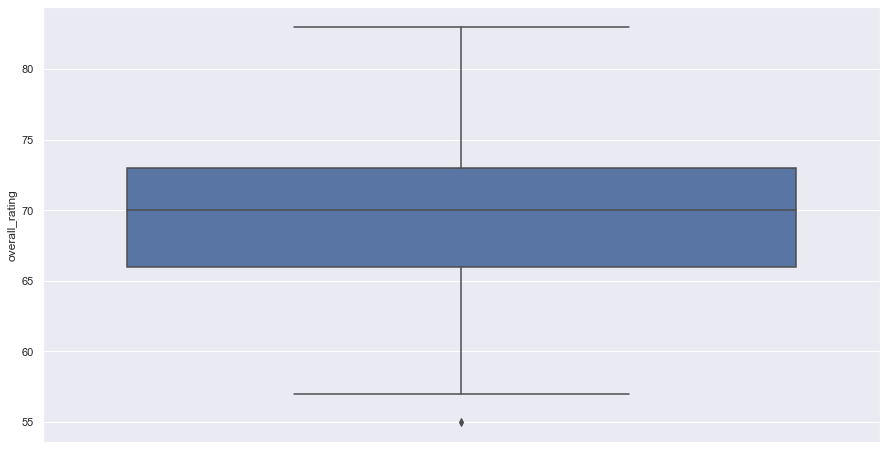

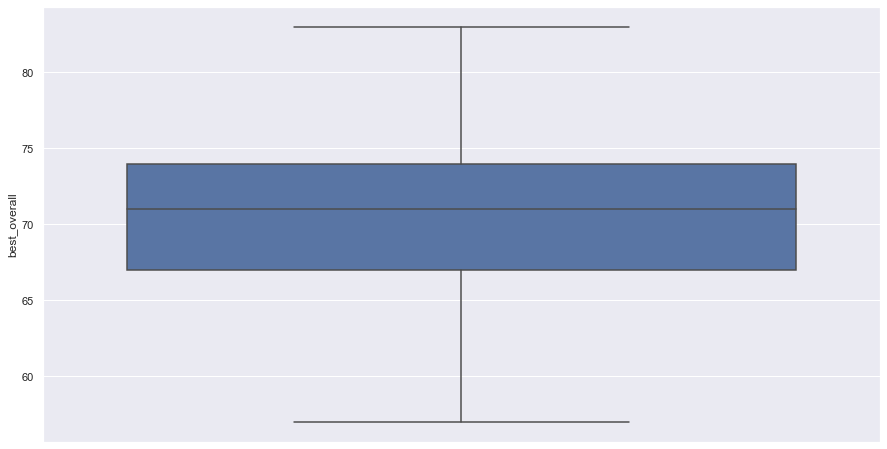

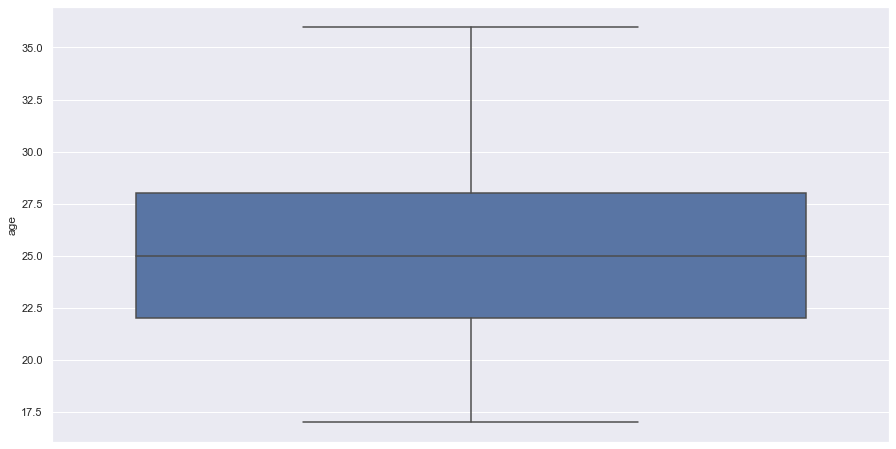

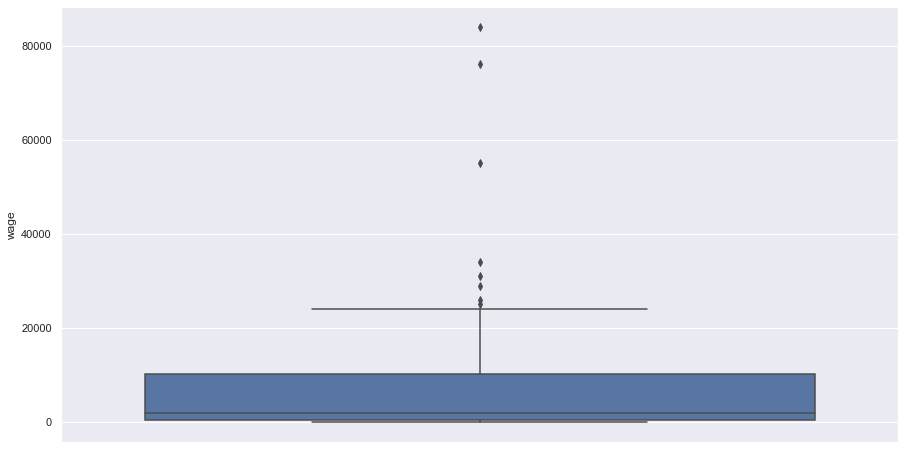

In [120]:
boxplot_columns_greek = greek[['overall_rating','best_overall','age','wage']]
boxplot_columns_greek
for col in boxplot_columns_greek:
    sns.boxplot(y=boxplot_columns_greek[col]) 
    plt.show()

In [121]:
# some countries by the law request from the clubs to have a percentage of indigenous players, let's check our case study
# greek talented players by age, wage and release clause
greek_talented=greek[(greek['overall_rating'] > 73) & (greek['wage'] < 15000) & (greek['age'] < 30)]
greek_talented.sort_values(by="release_clause", ascending=True)
# depends on the budget of the team we can make some offers to these players

name  age  overall_rating nationality              club  \
4835       S. Dioudis   27              74      Greece  Panathinaikos FC   
5271    A. Gianniotis   25              74      Greece    Olympiacos CFP   
13739     G. Masouras   26              74      Greece    Olympiacos CFP   
4942      P. Mantalos   28              75      Greece        AEK Athens   
10530   D. Giannoulis   24              74      Greece              PAOK   
4270     K. Fortounis   27              77      Greece    Olympiacos CFP   
5582   O. Vlachodimos   26              81      Greece            Greece   

       best_overall best_position   position  potential height  weight   foot  \
4835             74            GK         GK         76   6'2"      74  Right   
5271             73            GK         GK         78   6'4"      84  Right   
13739            74            LM      LM RM         75   6'0"      76  Right   
4942             75           CAM     CAM LM         75   5'9"      73  Right   
10530            74            LB      LB LM         78  5'10"      71   Left   
4270             78           CAM  CAM RM LM         78  5'11"      76  Right   
5582             81            GK         GK         86   6'2"      77  Right   

       growth        joined loan_date_end       value   wage  release_clause  \
4835        2   Aug 8, 2017       unknown   4700000.0    500      10700000.0   
5271        4   Jul 1, 2018       unknown   5000000.0   1000      10900000.0   
13739       1   Jan 1, 2019       unknown   6500000.0    500      14100000.0   
4942        0   Jul 1, 2014       unknown   6500000.0    500      14300000.0   
10530       4   Jul 1, 2014       unknown   6500000.0    500      14800000.0   
4270        1  Jul 21, 2014       unknown  10000000.0    500      21800000.0   
5582        5   Jul 1, 2018       unknown  17500000.0  14000      36300000.0   

                     contract  attacking  crossing  finishing  \
4835              2017 ~ 2023         85        13         13   
5271              2018 ~ 2019         92        11         12   
13739             2019 ~ 2022        355        72         72   
4942              2014 ~ 2022        334        73         66   
10530             2014 ~ 2022        290        75         42   
4270              2014 ~ 2023        354        77         72   
5582   SL Benfica 2018 ~ 2024         81        15         12   

       heading_accuracy  short_passing  volleys  skill  dribbling  curve  \
4835                 15             26     18.0     98         13   19.0   
5271                 20             29     20.0     85         14   13.0   
13739                73             71     67.0    344         73   69.0   
4942                 51             77     67.0    371         78   68.0   
10530                62             67     44.0    308         69   67.0   
4270                 57             77     71.0    400         82   84.0   
5582                 13             27     14.0     90         13   17.0   

       fk_accuracy  long_passing  ball_control  movement  acceleration  \
4835            19            23            24       273            40   
5271            20            18            20       243            34   
13739           56            71            75       364            74   
4942            71            75            79       371            74   
10530           40            65            67       383            82   
4270            80            74            80       374            74   
5582            13            24            23       274            42   

       sprint_speed  agility  reactions  balance  power  shot_power  jumping  \
4835             45     63.0         66     59.0    240          50     72.0   
5271             44     70.0         70     25.0    225          49     73.0   
13739            78     76.0         72     64.0    356          76     65.0   
4942             72     78.0         69     78.0    331          74     60.

In [122]:
# end